In [86]:
# Biblioteki wejściowe
import pandas as pd
import numpy as np
import posixpath as os
import pathlib
from pathlib import Path
import sys
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.kaleido.scope.mathjax = None
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import codecs
from pandas.tseries.offsets import MonthEnd

pd.options.display.max_rows=50000
pd.options.display.max_colwidth=100
pd.options.display.precision=2
pd.options.display.max_columns=50
pd.options.display.float_format='{0:,.2f}'.format


msc=11

### Przetwarzanie danych

In [87]:
# Pobiera dane wejściowe

DATA = Path(r'/Users/daniel_wojcik/Documents/KOPALNIA/MIS_REPORT_2022/MONTHLY_REPORTS_2022/DATA')
MAIN = Path(r'/Users/daniel_wojcik/Documents/KOPALNIA/MIS_REPORT_2022/MONTHLY_REPORTS_2022/SAL_202211')
ASSETS = Path(r'/Users/daniel_wojcik/Documents/KOPALNIA/MIS_REPORT_2022/MONTHLY_REPORTS_2022/SAL_202211/ASSETS')
IMAGES = Path(r'/Users/daniel_wojcik/Documents/KOPALNIA/MIS_REPORT_2022/MONTHLY_REPORTS_2022/SAL_202211/IMAGES')

t_sprzedaz_p=pd.read_pickle(DATA / 'B22_OUT_PLAN_SALES.pkl')
t_sprzedaz_fa=t=pd.read_excel(DATA / 'FA_Sales_202211.xlsx')
t_sprzedaz_fa.fillna(0,inplace=True)


# Uzupełnienie danych planu

t_sprzedaz_temp=t_sprzedaz_p[(t_sprzedaz_p['Id_Produkt']==1149)&(t_sprzedaz_p['Id_Kontrahent']==9999)].copy()

t_sprzedaz_temp['Id_Produkt']=1246
t_sprzedaz_temp['Kod_Produkt']='MATERIAŁ SKALNY'
t_sprzedaz_temp['Frakcja']='F[ND/ND]'
t_sprzedaz_temp['TYP']='INNE'
t_sprzedaz_temp['P_Ile']=0
t_sprzedaz_temp['P_L']=0
t_sprzedaz_temp['W_Ile']=0
t_sprzedaz_temp['W_L']=0
t_sprzedaz_p=pd.concat([t_sprzedaz_p,t_sprzedaz_temp],ignore_index=True)

t_sprzedaz_p.to_pickle(DATA /'B22_OUT_PLAN_SALES.pkl')

In [88]:
#Pobiera dane sprzedażowe

t_sprzedaz_p=t_sprzedaz_p[['Id_Kontrahent', 'N_Kontrahent', 'Id_Produkt', 'Kod_Produkt','M','Frakcja','TYP','P_Ile','P_L']]
t_n_puste=t_sprzedaz_p.groupby(['Id_Kontrahent'],as_index=False)['P_Ile'].sum()
t_n_puste=t_n_puste[t_n_puste['P_Ile']!=0]
t_n_puste=t_n_puste[['Id_Kontrahent']].copy()
t_n_puste['Id_Plan']='OK'

t_sprzedaz_p=pd.merge(t_sprzedaz_p,t_n_puste,how='inner',on=['Id_Kontrahent'])

t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'BOSTA-BETON' if x['Id_Kontrahent']==235 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'BUDIMEX' if x['Id_Kontrahent']==251 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'CEMEX' if x['Id_Kontrahent']==298 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'KOBYLARNIA' if x['Id_Kontrahent']==987 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'LAFARGE' if x['Id_Kontrahent']==1168 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'ERBEDIM' if x['Id_Kontrahent']==1770 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'INTERCRAFT' if x['Id_Kontrahent']==3804 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'KOMPANIA GÓRNICZA' if x['Id_Kontrahent']==3902 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'DOM' if x['Id_Kontrahent']==4327 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'TOPBETON' if x['Id_Kontrahent']==4927 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'MOSTY ŁÓDŹ' if x['Id_Kontrahent']==5299 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'STRABAG' if x['Id_Kontrahent']==5440 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'GODEL MOBILBETON' if x['Id_Kontrahent']==5455 else x['N_Kontrahent'],axis=1)
t_sprzedaz_p['N_Kontrahent']=t_sprzedaz_p.apply(lambda x:'POZOSTALI' if x['Id_Kontrahent']==9999 else x['N_Kontrahent'],axis=1)

t_sprzedaz_klient_p=t_sprzedaz_p[['Id_Kontrahent']]
t_sprzedaz_klient_p=t_sprzedaz_klient_p.drop_duplicates()
t_sprzedaz_klient_p['Info']='Jest'

t_sprzedaz_w=t_sprzedaz_fa
t_sprzedaz_w['W_L']=t_sprzedaz_w['Ilość(t)']*t_sprzedaz_w['Loco(zł/t)']
t_sprzedaz_w.rename(columns={'Ilość(t)':'W_Ile'},inplace=True)
t_sprzedaz_w=t_sprzedaz_w[['Id_Kontrahent', 'N_Kontrahent','Id_Produkt','Kod_Produkt','M','W_Ile', 'W_L']]

t_sprzedaz_w=pd.merge(t_sprzedaz_w,t_sprzedaz_klient_p,how='left',on=['Id_Kontrahent'])
t_sprzedaz_w['Id_Kontrahent']=t_sprzedaz_w.apply(lambda x: 9999 if x['Info']!='Jest' else x['Id_Kontrahent'],axis=1)

t_sprzedaz_w1=t_sprzedaz_w.groupby(['Id_Kontrahent', 'Id_Produkt','M'],as_index=False)[['W_Ile', 'W_L']].sum()

t_sprzedaz_p=pd.merge(t_sprzedaz_p,t_sprzedaz_w1,how='left',on=['Id_Kontrahent','Id_Produkt','M'])
t_sprzedaz_p.fillna(0,inplace=True)


In [89]:
t_check=pd.merge(t_sprzedaz_p,t_sprzedaz_w1,how='outer',on=['Id_Kontrahent','Id_Produkt','M'],indicator=True )
t_check[t_check['_merge']=='right_only']

,Id_Kontrahent,N_Kontrahent,Id_Produkt,Kod_Produkt,M,Frakcja,TYP,P_Ile,P_L,Id_Plan,W_Ile_x,W_L_x,W_Ile_y,W_L_y,_merge


# Wyniki sprzedażowe miesięczne

## Analiza ilościowa

##### Asortyment razem

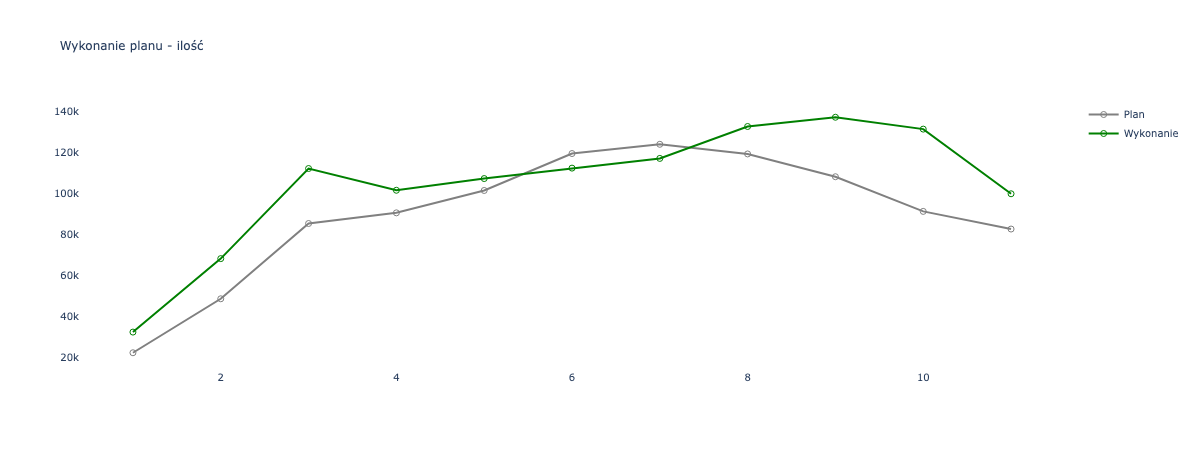

In [90]:
t_sprzedaz_temp=t_sprzedaz_p
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - ilość')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES /'7_Ilosc_Wykonanie_Planu_M.png')
fig.show()

In [91]:
# Sprzedaż ilościowa - asortyment razem

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']==msc]
t_tabela=t_tabela.groupby(['TYP'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'TYP':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_typy=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
0,GRYSY,"49,800.00","42,710.96","-7,089.04",-14.24
3,MIESZANKA,"5,000.00","32,247.57","27,247.57",544.95
5,PIASEK,"5,500.00","15,853.41","10,353.41",188.24
6,TŁUCZEŃ,"22,500.00","8,003.25","-14,496.75",-64.43
2,KLINIEC,0.00,641.96,641.96,0.00
1,INNE,0.00,427.26,427.26,0.00
4,NIESORT,0.00,103.66,103.66,0.00
RAZEM,RAZEM,"82,800.00","99,988.07","17,188.07",20.76


In [92]:
temp=t_sprzedaz_p.groupby(['M'],as_index=False)[['W_Ile','P_Ile']].sum()
temp.to_clipboard(decimal=',',excel=True,index=False)

In [93]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS /'3_Plan_EF_Asortyment.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
GRYSY,49.80,42.71
MIESZANKA,5.00,32.25
PIASEK,5.50,15.85
TŁUCZEŃ,22.50,8.00
KLINIEC,0.00,0.64
INNE,0.00,0.43
NIESORT,0.00,0.10
RAZEM,82.80,99.99


In [94]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS/ '4_Plan_EF_Asortyment_Odchylenie.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
GRYSY,-7.09,-14.24 \%
MIESZANKA,27.25,544.95 \%
PIASEK,10.35,188.24 \%
TŁUCZEŃ,-14.50,-64.43 \%
KLINIEC,0.64,0.00 \%
INNE,0.43,0.00 \%
NIESORT,0.10,0.00 \%
RAZEM,17.19,20.76 \%


#### Asortyment - grysy

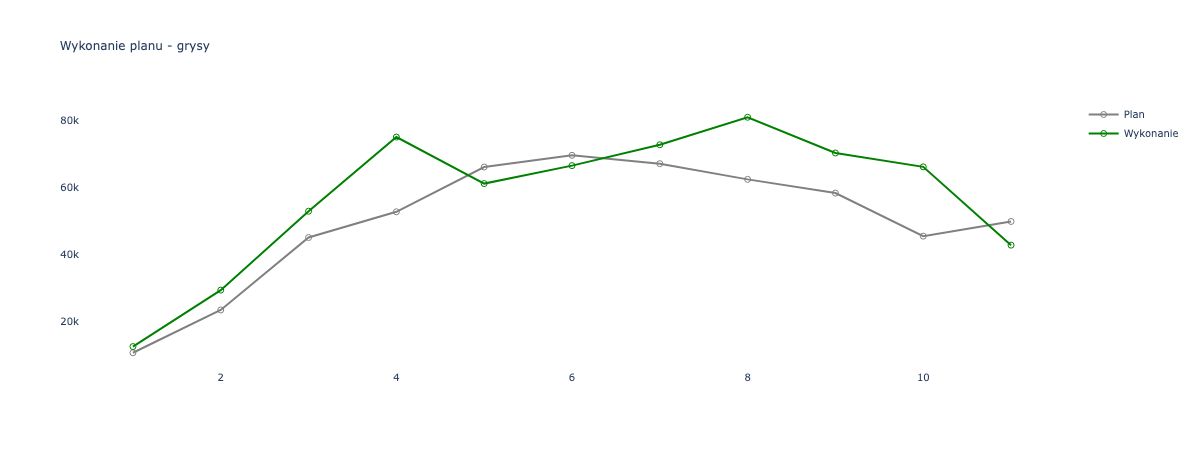

In [95]:
t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='GRYSY'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - grysy')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '8_Grysy_Wykonanie_Planu.png')
fig.show()

In [96]:
# Sprzedaż ilościowa - asortyment grysy

t_tabela=t_sprzedaz_p[(t_sprzedaz_p['M']==msc)&(t_sprzedaz_p['TYP']=='GRYSY')]
t_tabela=t_tabela.groupby(['Frakcja'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'Frakcja':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_typy=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
7,F[8/16],"8,500.00","9,854.71","1,354.71",15.94
4,F[4/8],"7,850.00","9,402.74","1,552.74",19.78
3,F[2/8],"6,500.00","6,936.39",436.39,6.71
2,F[2/5],"6,550.00","6,133.52",-416.48,-6.36
6,F[8/11],"14,300.00","4,486.78","-9,813.22",-68.62
0,F[11/16],"2,000.00","3,755.66","1,755.66",87.78
1,F[16/22],"4,100.00","2,141.16","-1,958.84",-47.78
5,F[5/8],0.00,0.00,0.00,0.00
RAZEM,RAZEM,"49,800.00","42,710.96","-7,089.04",-14.24


In [97]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '5_Plan_EF_Grysy.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
F[8/16],8.50,9.85
F[4/8],7.85,9.40
F[2/8],6.50,6.94
F[2/5],6.55,6.13
F[8/11],14.30,4.49
F[11/16],2.00,3.76
F[16/22],4.10,2.14
F[5/8],0.00,0.00
RAZEM,49.80,42.71


In [98]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '6_Plan_EF_Grysy_Odchylenie.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
F[8/16],1.35,15.94 \%
F[4/8],1.55,19.78 \%
F[2/8],0.44,6.71 \%
F[2/5],-0.42,-6.36 \%
F[8/11],-9.81,-68.62 \%
F[11/16],1.76,87.78 \%
F[16/22],-1.96,-47.78 \%
F[5/8],0.00,0.00 \%
RAZEM,-7.09,-14.24 \%


#### Pozostałe asortymenty

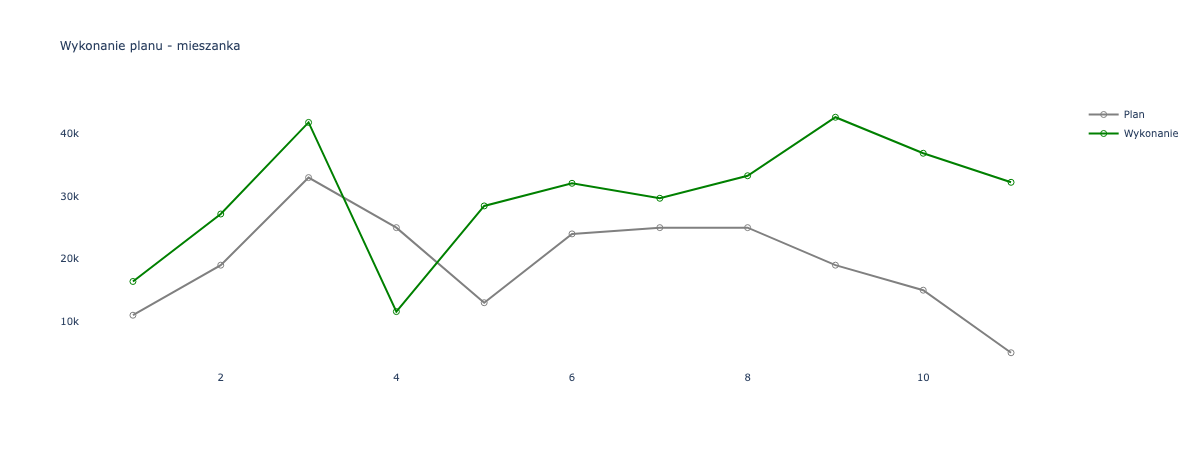

In [99]:
# Mieszanka

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='MIESZANKA'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - mieszanka')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '9_Mieszanka_Wykonanie_Planu.png')
fig.show()

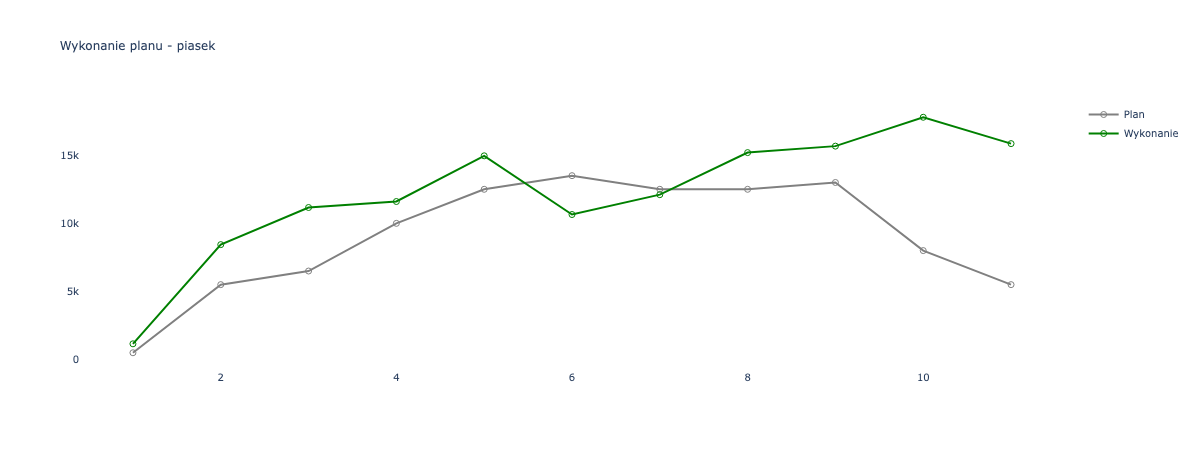

In [100]:
# Piasek

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='PIASEK'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - piasek')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '10_Piasek_Wykonanie_Planu.png')
fig.show()

In [172]:
# Sprzedaż ilościowa - asortyment piasek

t_tabela=t_sprzedaz_p[(t_sprzedaz_p['M']==msc)&(t_sprzedaz_p['TYP']=='PIASEK')]
t_tabela=t_tabela.groupby(['Frakcja'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'Frakcja':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_typy=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
0,F[0/2],"5,500.00","12,921.85","7,421.85",134.94
1,F[0/8],0.00,"2,931.56","2,931.56",0.00
RAZEM,RAZEM,"5,500.00","15,853.41","10,353.41",188.24


In [173]:
# Sprzedaż ilościowa - klient - PIASEK

t_tabela=t_sprzedaz_p[(t_sprzedaz_p['M']==msc)&(t_sprzedaz_p['TYP']=='PIASEK')]
t_tabela=t_tabela.groupby(['N_Kontrahent'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'N_Kontrahent':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_klienci=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
7,KOBYLARNIA,"4,500.00","7,598.00","3,098.00",68.84
11,POZOSTALI,500.00,"7,357.58","6,857.58","1,371.52"
8,KOMPANIA GÓRNICZA,500.00,897.83,397.83,79.57
0,BOSTA-BETON,0.00,0.00,0.00,0.00
1,BUDIMEX,0.00,0.00,0.00,0.00
2,CEMEX,0.00,0.00,0.00,0.00
3,DOM,0.00,0.00,0.00,0.00
4,ERBEDIM,0.00,0.00,0.00,0.00
5,GODEL MOBILBETON,0.00,0.00,0.00,0.00
6,INTERCRAFT,0.00,0.00,0.00,0.00


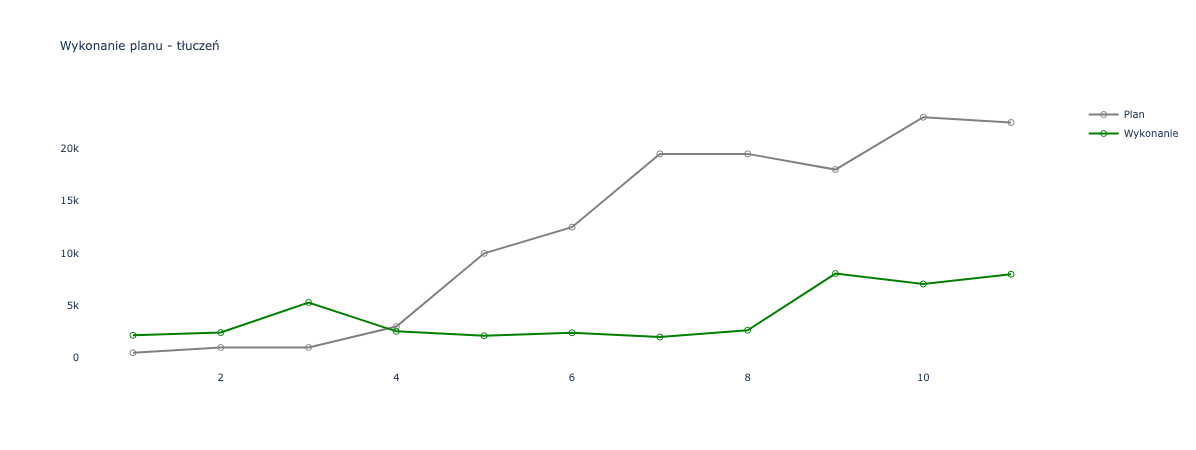

In [101]:
# Tłuczeń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='TŁUCZEŃ'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - tłuczeń')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '11_Tluczen_Wykonanie_Planu.png')
fig.show()

#### Klienci

In [102]:
# Sprzedaż ilościowa - klient

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']==msc]
t_tabela=t_tabela.groupby(['N_Kontrahent'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'N_Kontrahent':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_klienci=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
11,POZOSTALI,"10,500.00","60,491.06","49,991.06",476.11
7,KOBYLARNIA,"17,000.00","16,834.00",-166.00,-0.98
0,BOSTA-BETON,"9,100.00","8,568.50",-531.50,-5.84
8,KOMPANIA GÓRNICZA,"2,200.00","3,561.06","1,361.06",61.87
5,GODEL MOBILBETON,"2,000.00","3,163.56","1,163.56",58.18
3,DOM,"6,000.00","2,186.00","-3,814.00",-63.57
12,STRABAG,"7,000.00","1,940.60","-5,059.40",-72.28
10,MOSTY ŁÓDŹ,0.00,"1,564.50","1,564.50",0.00
13,TOPBETON,0.00,"1,335.79","1,335.79",0.00
1,BUDIMEX,"8,000.00",343.00,"-7,657.00",-95.71


In [103]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '7_Plan_EF_Klienci_Ilosc_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
POZOSTALI,10.50,60.49
KOBYLARNIA,17.00,16.83
BOSTA-BETON,9.10,8.57
KOMPANIA GÓRNICZA,2.20,3.56
GODEL MOBILBETON,2.00,3.16
DOM,6.00,2.19
STRABAG,7.00,1.94
MOSTY ŁÓDŹ,0.00,1.56
TOPBETON,0.00,1.34
BUDIMEX,8.00,0.34


In [104]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '8_Plan_EF_Klienci_Odchylenie_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
POZOSTALI,49.99,476.11 \%
KOBYLARNIA,-0.17,-0.98 \%
BOSTA-BETON,-0.53,-5.84 \%
KOMPANIA GÓRNICZA,1.36,61.87 \%
GODEL MOBILBETON,1.16,58.18 \%
DOM,-3.81,-63.57 \%
STRABAG,-5.06,-72.28 \%
MOSTY ŁÓDŹ,1.56,0.00 \%
TOPBETON,1.34,0.00 \%
BUDIMEX,-7.66,-95.71 \%


## Analiza wartościowa

##### Asortyment razem

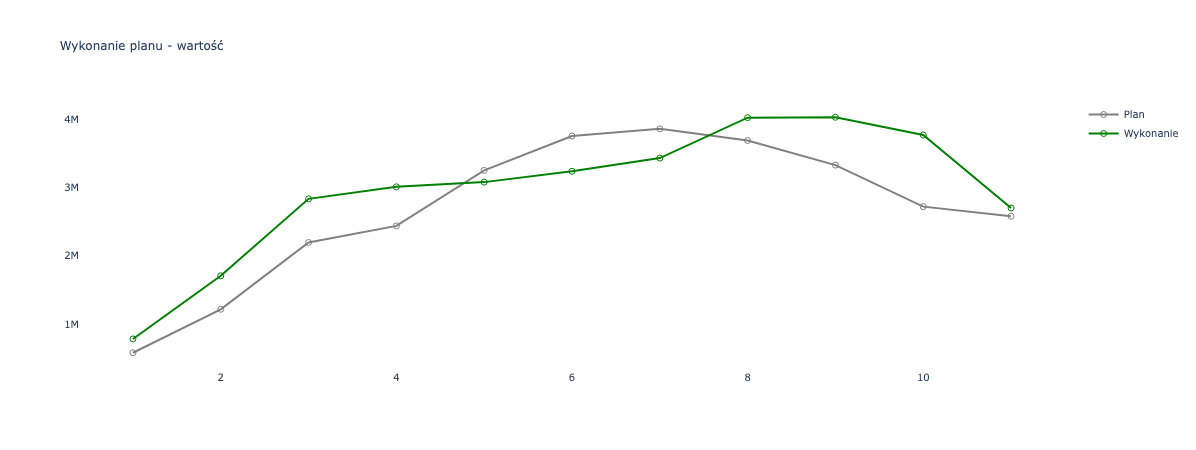

In [105]:
t_sprzedaz_temp=t_sprzedaz_p
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_L'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_L'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - wartość')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '12_Wartosc_Wykonanie_Planu.png')
fig.show()

In [106]:
# Sprzedaż wartościowa - asortyment razem

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']==msc]
t_tabela=t_tabela.groupby(['TYP'],as_index=False)[['P_L','W_L']].sum()
t_tabela.rename(columns={'TYP':'Pozycja','W_L':'W[2022]','P_L':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_typy=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
0,GRYSY,"1,786,666.73","1,423,186.32","-363,480.41",-20.34
3,MIESZANKA,"123,625.00","732,745.77","609,120.77",492.72
5,PIASEK,"96,792.04","270,695.46","173,903.43",179.67
6,TŁUCZEŃ,"574,080.00","248,995.17","-325,084.83",-56.63
2,KLINIEC,0.00,"18,695.22","18,695.22",0.00
1,INNE,0.00,"4,681.10","4,681.10",0.00
4,NIESORT,0.00,"3,265.29","3,265.29",0.00
RAZEM,RAZEM,"2,581,163.77","2,702,264.34","121,100.57",4.69


In [107]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '9_Plan_EF_Asortyment_Wartosci_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
GRYSY,"1,786.67","1,423.19"
MIESZANKA,123.62,732.75
PIASEK,96.79,270.70
TŁUCZEŃ,574.08,249.00
KLINIEC,0.00,18.70
INNE,0.00,4.68
NIESORT,0.00,3.27
RAZEM,"2,581.16","2,702.26"


In [108]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '10_Plan_EF_Asortyment_Odchylenie_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
GRYSY,-363.48,-20.34 \%
MIESZANKA,609.12,492.72 \%
PIASEK,173.90,179.67 \%
TŁUCZEŃ,-325.08,-56.63 \%
KLINIEC,18.70,0.00 \%
INNE,4.68,0.00 \%
NIESORT,3.27,0.00 \%
RAZEM,121.10,4.69 \%


#### Asortyment - grysy

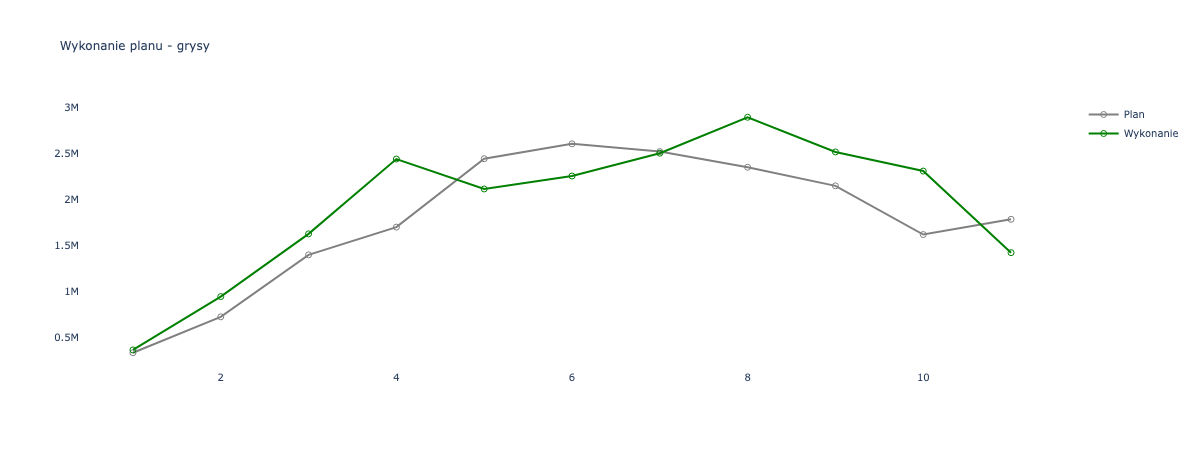

In [109]:
t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='GRYSY'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_L'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_L'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - grysy')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '13_Grysy_Wykonanie_Planu.png')
fig.show()

In [110]:
# Sprzedaż wartościowa - asortyment grysy

t_tabela=t_sprzedaz_p[(t_sprzedaz_p['M']==msc)&(t_sprzedaz_p['TYP']=='GRYSY')]
t_tabela=t_tabela.groupby(['Frakcja'],as_index=False)[['P_L','W_L']].sum()
t_tabela.rename(columns={'Frakcja':'Pozycja','W_L':'W[2022]','P_L':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_typy=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
4,F[4/8],"300,535.58","343,926.29","43,390.71",14.44
7,F[8/16],"267,260.00","313,956.15","46,696.15",17.47
3,F[2/8],"203,952.50","216,259.55","12,307.06",6.03
2,F[2/5],"207,059.38","183,533.53","-23,525.85",-11.36
6,F[8/11],"601,502.95","162,376.37","-439,126.58",-73.00
0,F[11/16],"70,230.81","124,676.50","54,445.68",77.52
1,F[16/22],"136,125.50","78,457.93","-57,667.57",-42.36
5,F[5/8],0.00,0.00,0.00,0.00
RAZEM,RAZEM,"1,786,666.73","1,423,186.32","-363,480.41",-20.34


In [111]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '11_Plan_EF_Grysy_Wartosci_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
F[4/8],300.54,343.93
F[8/16],267.26,313.96
F[2/8],203.95,216.26
F[2/5],207.06,183.53
F[8/11],601.50,162.38
F[11/16],70.23,124.68
F[16/22],136.13,78.46
F[5/8],0.00,0.00
RAZEM,"1,786.67","1,423.19"


In [112]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '12_Plan_EF_Grysy_Odchylenie_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
F[4/8],43.39,14.44 \%
F[8/16],46.70,17.47 \%
F[2/8],12.31,6.03 \%
F[2/5],-23.53,-11.36 \%
F[8/11],-439.13,-73.00 \%
F[11/16],54.45,77.52 \%
F[16/22],-57.67,-42.36 \%
F[5/8],0.00,0.00 \%
RAZEM,-363.48,-20.34 \%


#### Pozostałe asortymenty

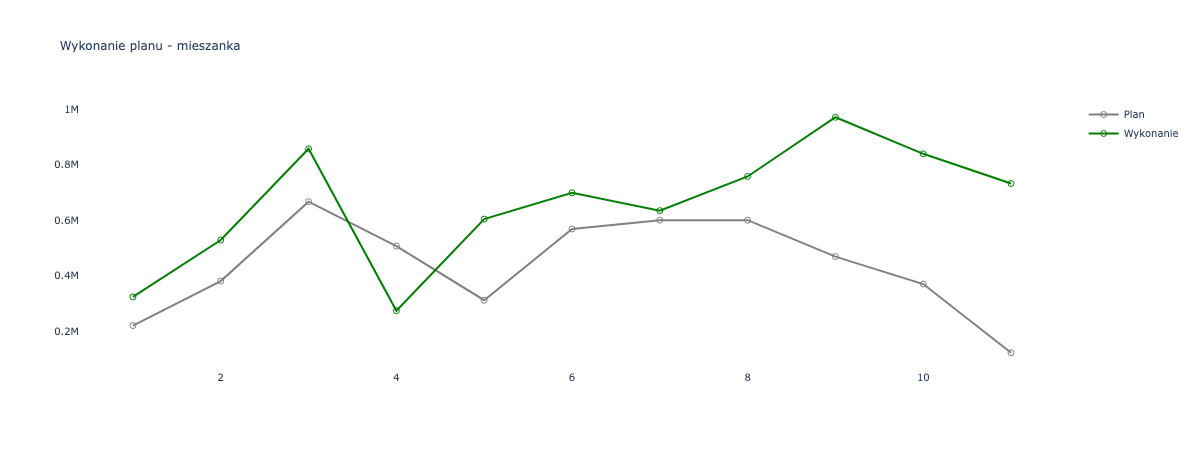

In [113]:
# Mieszanka

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='MIESZANKA'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_L'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_L'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - mieszanka')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '14_Mieszanka_Wykonanie_Planu.png')
fig.show()

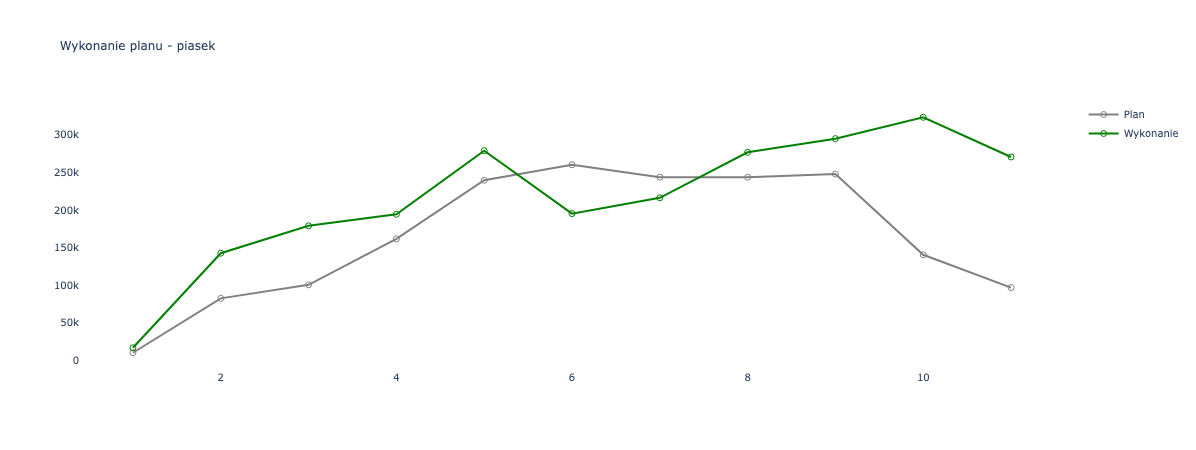

In [114]:
# Piasek

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='PIASEK'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_L'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_L'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - piasek')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '15_Piasek_Wykonanie_Planu.png')
fig.show()

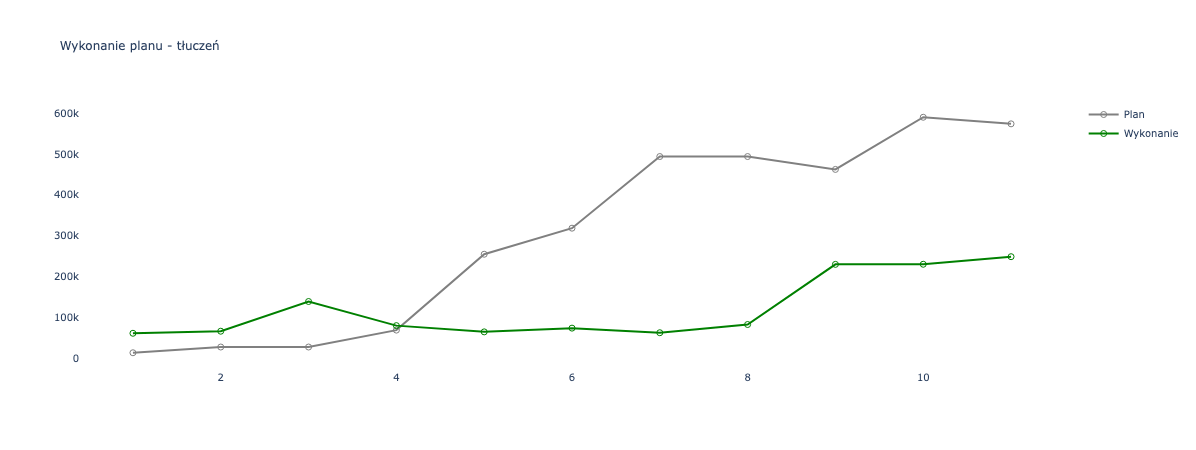

In [115]:
# Tłuczeń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='TŁUCZEŃ'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_L'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_L'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - tłuczeń')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '16_Tluczen_Wykonanie_Planu.png')
fig.show()

### Klienci

In [116]:
# Sprzedaż ilościowa - klient

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']==msc]
t_tabela=t_tabela.groupby(['N_Kontrahent'],as_index=False)[['P_L','W_L']].sum()
t_tabela.rename(columns={'N_Kontrahent':'Pozycja','W_L':'W[2022]','P_L':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_klienci=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]
t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
11,POZOSTALI,"330,625.00","1,604,821.53","1,274,196.53",385.39
7,KOBYLARNIA,"499,410.77","428,309.84","-71,100.93",-14.24
0,BOSTA-BETON,"274,183.00","240,003.68","-34,179.32",-12.47
8,KOMPANIA GÓRNICZA,"78,315.00","118,095.90","39,780.90",50.80
5,GODEL MOBILBETON,"72,450.00","109,142.82","36,692.82",50.65
12,STRABAG,"226,435.00","60,847.41","-165,587.59",-73.13
13,TOPBETON,0.00,"48,088.44","48,088.44",0.00
3,DOM,"142,830.00","47,020.86","-95,809.14",-67.08
10,MOSTY ŁÓDŹ,0.00,"32,213.85","32,213.85",0.00
1,BUDIMEX,"368,000.00","13,720.00","-354,280.00",-96.27


In [117]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '13_Plan_EF_Klienci_Ilosc_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
POZOSTALI,330.62,"1,604.82"
KOBYLARNIA,499.41,428.31
BOSTA-BETON,274.18,240.00
KOMPANIA GÓRNICZA,78.31,118.10
GODEL MOBILBETON,72.45,109.14
STRABAG,226.43,60.85
TOPBETON,0.00,48.09
DOM,142.83,47.02
MOSTY ŁÓDŹ,0.00,32.21
BUDIMEX,368.00,13.72


In [118]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '14_Plan_EF_Klienci_Odchylenie_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
POZOSTALI,"1,274.20",385.39 \%
KOBYLARNIA,-71.10,-14.24 \%
BOSTA-BETON,-34.18,-12.47 \%
KOMPANIA GÓRNICZA,39.78,50.80 \%
GODEL MOBILBETON,36.69,50.65 \%
STRABAG,-165.59,-73.13 \%
TOPBETON,48.09,0.00 \%
DOM,-95.81,-67.08 \%
MOSTY ŁÓDŹ,32.21,0.00 \%
BUDIMEX,-354.28,-96.27 \%


### Ceny

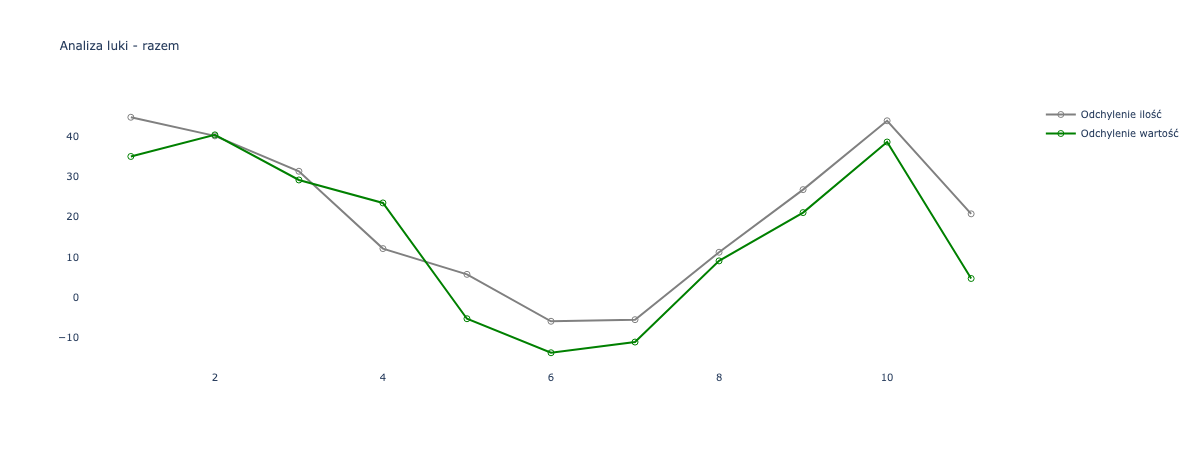

In [119]:
# Analiza Luki

#t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='TŁUCZEŃ'].copy()
t_sprzedaz_temp=t_sprzedaz_p
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L','W_Ile','P_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
t_wykres['Delta_Ile']=(t_wykres['W_Ile']/t_wykres['P_Ile']-1)*100
t_wykres['Delta_Wartość']=(t_wykres['W_L']/t_wykres['P_L']-1)*100


fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['Delta_Ile'],  marker_symbol='circle-open',name="Odchylenie ilość",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['Delta_Wartość'],  marker_symbol='circle-open',name="Odchylenie wartość",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Analiza luki - razem')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '17_Analiza_Luki_Razem.png')
fig.show()

In [120]:
# Cena

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']==msc]
t_tabela=t_tabela.groupby(['TYP'],as_index=False)[['P_L','W_L','P_Ile','W_Ile']].sum()
t_tabela['C_P']=t_tabela['P_L']/t_tabela['P_Ile']
t_tabela['C_W']=t_tabela['W_L']/t_tabela['W_Ile']

t_tabela.fillna(0,inplace=True)

t_tabela.rename(columns={'TYP':'Pozycja','C_W':'W[2022]','C_P':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
t_tabela.loc['RAZEM','W[2022]']=t_tabela.loc['RAZEM','W_L']/t_tabela.loc['RAZEM','W_Ile']
t_tabela.loc['RAZEM','P[2022]']=t_tabela.loc['RAZEM','P_L']/t_tabela.loc['RAZEM','P_Ile']

last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]

t_tabela=t_tabela[['Pozycja','W[2022]','P[2022]']].copy()

t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)

t_tabela

,Pozycja,W[2022],P[2022],Delta,Delta[proc]
0,GRYSY,33.32,35.88,-2.56,-7.12
4,NIESORT,31.50,0.00,31.50,0.00
6,TŁUCZEŃ,31.11,25.51,5.60,21.94
2,KLINIEC,29.12,0.00,29.12,0.00
3,MIESZANKA,22.72,24.72,-2.00,-8.10
5,PIASEK,17.07,17.60,-0.52,-2.98
1,INNE,10.96,0.00,10.96,0.00
RAZEM,RAZEM,27.03,31.17,-4.15,-13.30


In [121]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '15_Plan_EF_Ceny.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
GRYSY,35.88,33.32
NIESORT,0.00,31.50
TŁUCZEŃ,25.51,31.11
KLINIEC,0.00,29.12
MIESZANKA,24.72,22.72
PIASEK,17.60,17.07
INNE,0.00,10.96
RAZEM,31.17,27.03


In [122]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS /'16_Plan_EF_Klienci_Odchylenie_M.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
GRYSY,-2.56,-7.12 \%
NIESORT,31.50,0.00 \%
TŁUCZEŃ,5.60,21.94 \%
KLINIEC,29.12,0.00 \%
MIESZANKA,-2.00,-8.10 \%
PIASEK,-0.52,-2.98 \%
INNE,10.96,0.00 \%
RAZEM,-4.15,-13.30 \%


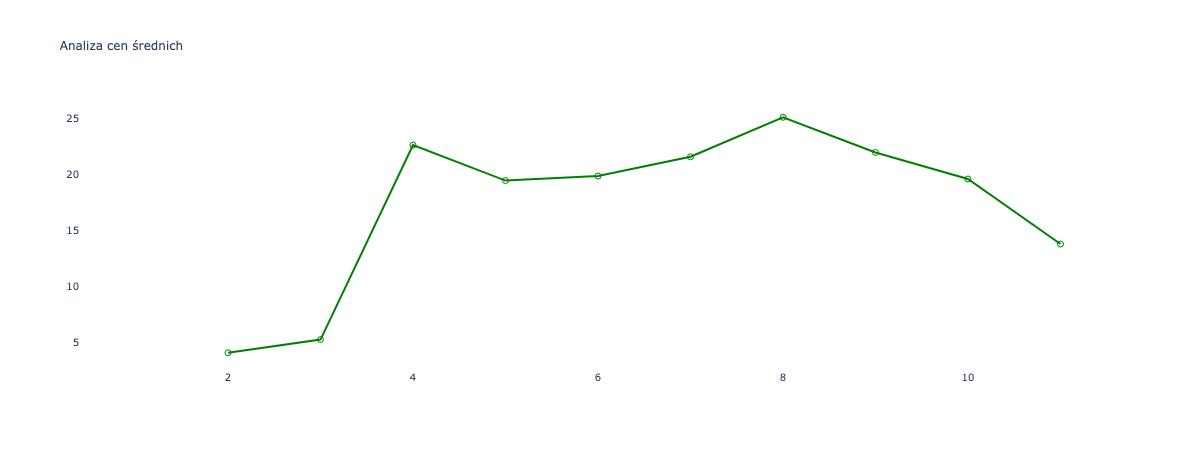

In [123]:
# Analiza Cen Średnich

#t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='TŁUCZEŃ'].copy()
t_sprzedaz_temp=t_sprzedaz_p
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L','W_Ile','P_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
t_wykres['Cena']=(t_wykres['W_L']/t_wykres['W_Ile'])
t_wykres['PCT']=t_wykres['Cena'].pct_change().cumsum()*100

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PCT'],  marker_symbol='circle-open',name="Cena średnia",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Analiza cen średnich')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '18_Analiza_Cen_Razem.png')
fig.show()

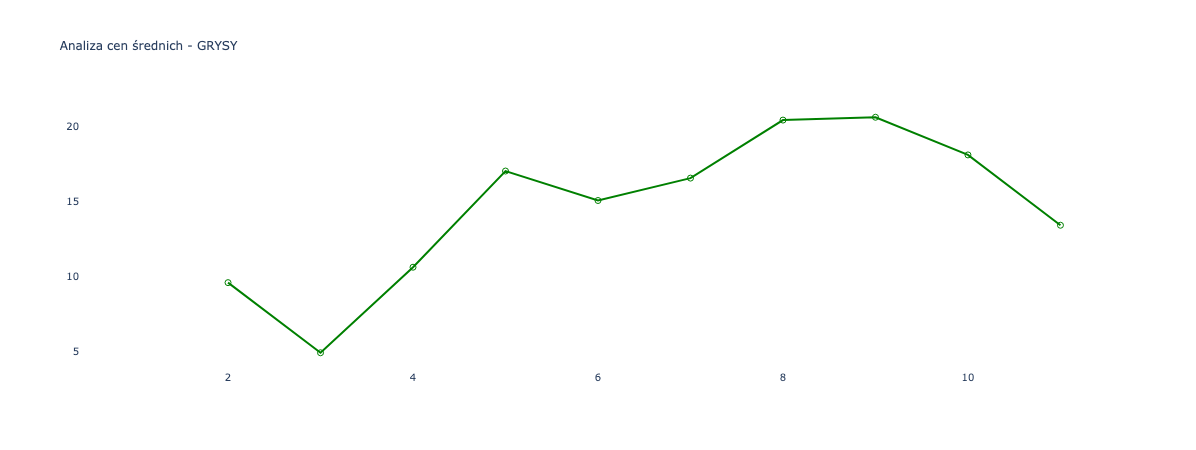

In [124]:
# Analiza Cen Średnich

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='GRYSY'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L','W_Ile','P_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
t_wykres['Cena']=(t_wykres['W_L']/t_wykres['W_Ile'])
t_wykres['PCT']=t_wykres['Cena'].pct_change().cumsum()*100

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PCT'],  marker_symbol='circle-open',name="Cena średnia",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Analiza cen średnich - GRYSY')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '19_Analiza_Cen_Grysy.png')
fig.show()

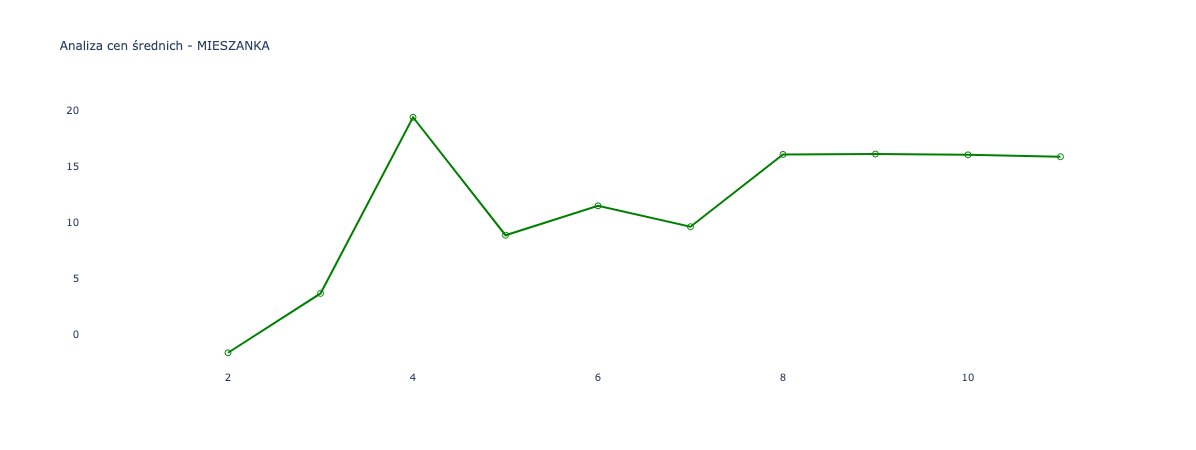

In [125]:
# Analiza Cen Średnich

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='MIESZANKA'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L','W_Ile','P_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
t_wykres['Cena']=(t_wykres['W_L']/t_wykres['W_Ile'])
t_wykres['PCT']=t_wykres['Cena'].pct_change().cumsum()*100

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PCT'],  marker_symbol='circle-open',name="Cena średnia",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Analiza cen średnich - MIESZANKA')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '20_Analiza_Cen_Mieszanki.png')
fig.show()

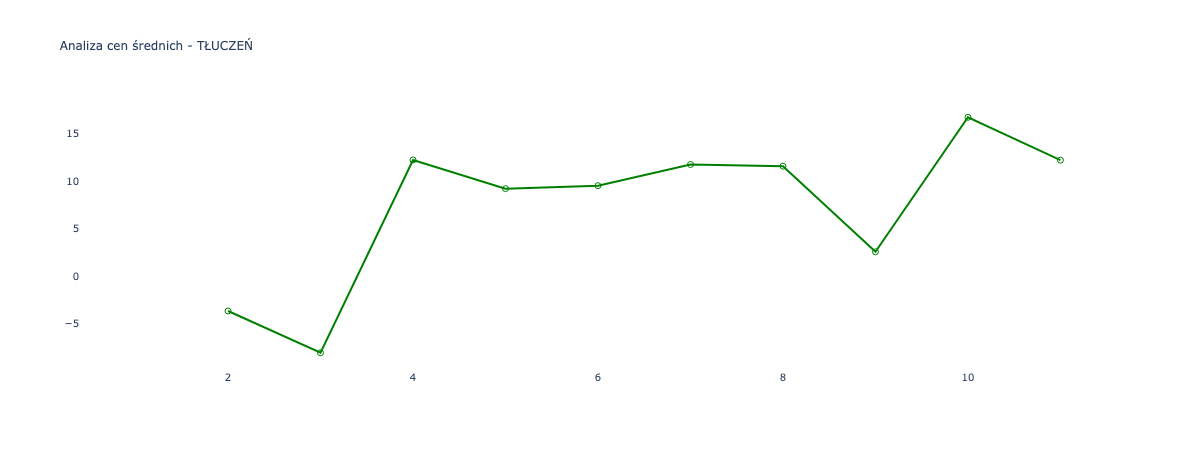

In [126]:
# Analiza Cen Średnich

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='TŁUCZEŃ'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_L','W_L','W_Ile','P_Ile']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]
t_wykres['Cena']=(t_wykres['W_L']/t_wykres['W_Ile'])
t_wykres['PCT']=t_wykres['Cena'].pct_change().cumsum()*100

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PCT'],  marker_symbol='circle-open',name="Cena średnia",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Analiza cen średnich - TŁUCZEŃ')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '21_Analiza_Cen_Tluczen.png')
fig.show()

In [127]:
temp=t_sprzedaz_p[t_sprzedaz_p['TYP']=='TŁUCZEŃ']
temp=temp[temp['W_Ile']!=0]
temp['Cena']=temp['W_L']/temp['W_Ile']
temp.sort_values(by='M')

,Id_Kontrahent,N_Kontrahent,Id_Produkt,Kod_Produkt,M,Frakcja,TYP,P_Ile,P_L,Id_Plan,W_Ile,W_L,Cena
4860,9999,POZOSTALI,1153,"Kruszywo amfibolitowe frakcji 31,5/63 mm",1,F[31/63],TŁUCZEŃ,500,"14,000.00",OK,171.46,"4,774.92",27.85
3780,5299,MOSTY ŁÓDŹ,1153,"Kruszywo amfibolitowe frakcji 31,5/63 mm",1,F[31/63],TŁUCZEŃ,0,0.00,OK,840.96,"22,774.56",27.08
4788,9999,POZOSTALI,1233,Kruszywo amfibolitowe frakcji 32/63 mm,1,F[32/63],TŁUCZEŃ,0,0.00,OK,"1,149.58","34,095.16",29.66
3781,5299,MOSTY ŁÓDŹ,1153,"Kruszywo amfibolitowe frakcji 31,5/63 mm",2,F[31/63],TŁUCZEŃ,0,0.00,OK,951.86,"23,859.96",25.07
4861,9999,POZOSTALI,1153,"Kruszywo amfibolitowe frakcji 31,5/63 mm",2,F[31/63],TŁUCZEŃ,1000,"28,000.00",OK,771.02,"23,052.16",29.90
4789,9999,POZOSTALI,1233,Kruszywo amfibolitowe frakcji 32/63 mm,2,F[32/63],TŁUCZEŃ,0,0.00,OK,705.10,"19,795.40",28.07
3026,4327,DOM,1152,"Kruszywo amfibolitowe frakcji 31,5/50 mm",3,"F[31,5/50]",TŁUCZEŃ,0,0.00,OK,"2,099.00","43,365.34",20.66
4862,9999,POZOSTALI,1153,"Kruszywo amfibolitowe frakcji 31,5/63 mm",3,F[31/63],TŁUCZEŃ,1000,"28,000.00",OK,665.50,"20,952.46",31.48
3782,5299,MOSTY ŁÓDŹ,1153,"Kruszywo amfibolitowe frakcji 31,5/63 mm",3,F[31/63],TŁUCZEŃ,0,0.00,OK,644.42,"18,300.36",28.40
4826,9999,POZOSTALI,1152,"Kruszywo amfibolitowe frakcji 31,5/50 mm",3,"F[31,5/50]",TŁUCZEŃ,0,0.00,OK,25.18,881.30,35.00


# Wyniki sprzedażowe narastająco

In [128]:
# Sprzedaż ilościowa - asortyment

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']<=msc]
t_tabela=t_tabela.groupby(['TYP'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'TYP':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_typy=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]

t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
0,GRYSY,"550,200.00","630,111.50","79,911.50",14.52
3,MIESZANKA,"214,000.00","332,313.20","118,313.20",55.29
5,PIASEK,"100,000.00","134,577.39","34,577.39",34.58
6,TŁUCZEŃ,"130,500.00","44,776.01","-85,723.99",-65.69
2,KLINIEC,0.00,"6,558.04","6,558.04",0.00
1,INNE,0.00,"4,744.16","4,744.16",0.00
4,NIESORT,0.00,563.59,563.59,0.00
RAZEM,RAZEM,"994,700.00","1,153,643.89","158,943.89",15.98


In [129]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '17_YTD_Asortyment_Ilosc.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
GRYSY,550.20,630.11
MIESZANKA,214.00,332.31
PIASEK,100.00,134.58
TŁUCZEŃ,130.50,44.78
KLINIEC,0.00,6.56
INNE,0.00,4.74
NIESORT,0.00,0.56
RAZEM,994.70,"1,153.64"


In [130]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '18_YTD_Asortyment_Ilosc_O.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
GRYSY,79.91,14.52 \%
MIESZANKA,118.31,55.29 \%
PIASEK,34.58,34.58 \%
TŁUCZEŃ,-85.72,-65.69 \%
KLINIEC,6.56,0.00 \%
INNE,4.74,0.00 \%
NIESORT,0.56,0.00 \%
RAZEM,158.94,15.98 \%


In [131]:
# Sprzedaż ilościowa - klient

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']<=msc]
t_tabela=t_tabela.groupby(['N_Kontrahent'],as_index=False)[['P_Ile','W_Ile']].sum()
t_tabela.rename(columns={'N_Kontrahent':'Pozycja','W_Ile':'W[2022]','P_Ile':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_klienci=t_tabela[['Pozycja']]
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]

t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)
t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
11,POZOSTALI,"157,500.00","387,925.06","230,425.06",146.30
0,BOSTA-BETON,"124,300.00","146,794.78","22,494.78",18.10
7,KOBYLARNIA,"139,000.00","128,333.00","-10,667.00",-7.67
8,KOMPANIA GÓRNICZA,"177,800.00","128,070.90","-49,729.10",-27.97
10,MOSTY ŁÓDŹ,"115,000.00","119,645.21","4,645.21",4.04
2,CEMEX,"7,300.00","83,749.65","76,449.65","1,047.26"
5,GODEL MOBILBETON,"38,500.00","57,631.26","19,131.26",49.69
9,LAFARGE,"59,000.00","41,061.00","-17,939.00",-30.41
13,TOPBETON,"7,300.00","19,742.64","12,442.64",170.45
1,BUDIMEX,"22,000.00","16,457.26","-5,542.74",-25.19


In [132]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '20_YTD_Klient.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
POZOSTALI,157.50,387.93
BOSTA-BETON,124.30,146.79
KOBYLARNIA,139.00,128.33
KOMPANIA GÓRNICZA,177.80,128.07
MOSTY ŁÓDŹ,115.00,119.65
CEMEX,7.30,83.75
GODEL MOBILBETON,38.50,57.63
LAFARGE,59.00,41.06
TOPBETON,7.30,19.74
BUDIMEX,22.00,16.46


In [133]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '21_YTD_Klient_Odchylenie.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
POZOSTALI,230.43,146.30 \%
BOSTA-BETON,22.49,18.10 \%
KOBYLARNIA,-10.67,-7.67 \%
KOMPANIA GÓRNICZA,-49.73,-27.97 \%
MOSTY ŁÓDŹ,4.65,4.04 \%
CEMEX,76.45,"1,047.26 \%"
GODEL MOBILBETON,19.13,49.69 \%
LAFARGE,-17.94,-30.41 \%
TOPBETON,12.44,170.45 \%
BUDIMEX,-5.54,-25.19 \%


In [134]:
# Sprzedaż wartościowa

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']<=msc]
t_tabela=t_tabela.groupby(['TYP'],as_index=False)[['P_L','W_L']].sum()
t_tabela.rename(columns={'TYP':'Pozycja','W_L':'W[2022]','P_L':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]

t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)

t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
0,GRYSY,"19,650,516.02","21,417,526.15","1,767,010.14",8.99
3,MIESZANKA,"4,826,075.00","7,227,952.13","2,401,877.13",49.77
5,PIASEK,"1,827,169.71","2,389,468.02","562,298.31",30.77
6,TŁUCZEŃ,"3,328,120.00","1,343,248.10","-1,984,871.90",-59.64
2,KLINIEC,0.00,"188,222.33","188,222.33",0.00
1,INNE,0.00,"47,046.50","47,046.50",0.00
4,NIESORT,0.00,"14,577.11","14,577.11",0.00
RAZEM,RAZEM,"29,631,880.73","32,628,040.34","2,996,159.61",10.11


In [135]:

# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '22_YTD_Wartosc_A.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
GRYSY,"19,650.52","21,417.53"
MIESZANKA,"4,826.07","7,227.95"
PIASEK,"1,827.17","2,389.47"
TŁUCZEŃ,"3,328.12","1,343.25"
KLINIEC,0.00,188.22
INNE,0.00,47.05
NIESORT,0.00,14.58
RAZEM,"29,631.88","32,628.04"


In [136]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '23_YTD_Wartosc_A_O.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
GRYSY,"1,767.01",8.99 \%
MIESZANKA,"2,401.88",49.77 \%
PIASEK,562.30,30.77 \%
TŁUCZEŃ,"-1,984.87",-59.64 \%
KLINIEC,188.22,0.00 \%
INNE,47.05,0.00 \%
NIESORT,14.58,0.00 \%
RAZEM,"2,996.16",10.11 \%


In [137]:
# Sprzedaż wartościowa - klient

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']<=msc]
t_tabela=t_tabela.groupby(['N_Kontrahent'],as_index=False)[['P_L','W_L']].sum()
t_tabela.rename(columns={'N_Kontrahent':'Pozycja','W_L':'W[2022]','P_L':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]

t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)

t_tabela

,Pozycja,P[2022],W[2022],Delta,Delta[proc]
11,POZOSTALI,"4,524,175.00","9,945,947.47","5,421,772.47",119.84
0,BOSTA-BETON,"3,593,461.00","4,098,125.08","504,664.08",14.04
8,KOMPANIA GÓRNICZA,"6,134,160.00","4,062,829.12","-2,071,330.88",-33.77
7,KOBYLARNIA,"3,760,787.73","3,470,378.04","-290,409.69",-7.72
2,CEMEX,"245,850.00","3,177,980.96","2,932,130.96","1,192.65"
10,MOSTY ŁÓDŹ,"2,417,000.00","2,418,174.86","1,174.86",0.05
5,GODEL MOBILBETON,"1,335,600.00","1,873,951.48","538,351.49",40.31
9,LAFARGE,"2,469,404.50","1,556,866.34","-912,538.16",-36.95
13,TOPBETON,"245,850.00","680,526.90","434,676.90",176.81
1,BUDIMEX,"964,000.00","570,850.44","-393,149.56",-40.78


In [138]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela['P[2022]']=tabela['P[2022]']/1000
tabela['W[2022]']=tabela['W[2022]']/1000
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '24_YTD_Wartosc_Klienta.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela


Pozycja,P[2022],W[2022]
POZOSTALI,"4,524.18","9,945.95"
BOSTA-BETON,"3,593.46","4,098.13"
KOMPANIA GÓRNICZA,"6,134.16","4,062.83"
KOBYLARNIA,"3,760.79","3,470.38"
CEMEX,245.85,"3,177.98"
MOSTY ŁÓDŹ,"2,417.00","2,418.17"
GODEL MOBILBETON,"1,335.60","1,873.95"
LAFARGE,"2,469.40","1,556.87"
TOPBETON,245.85,680.53
BUDIMEX,964.00,570.85


In [139]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela['Delta']=tabela['Delta']/1000
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '25_YTD_Wartosc_Klienta_O.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
POZOSTALI,"5,421.77",119.84 \%
BOSTA-BETON,504.66,14.04 \%
KOMPANIA GÓRNICZA,"-2,071.33",-33.77 \%
KOBYLARNIA,-290.41,-7.72 \%
CEMEX,"2,932.13","1,192.65 \%"
MOSTY ŁÓDŹ,1.17,0.05 \%
GODEL MOBILBETON,538.35,40.31 \%
LAFARGE,-912.54,-36.95 \%
TOPBETON,434.68,176.81 \%
BUDIMEX,-393.15,-40.78 \%


In [140]:
# Cena

t_tabela=t_sprzedaz_p[t_sprzedaz_p['M']<=msc]
t_tabela=t_tabela.groupby(['TYP'],as_index=False)[['P_L','W_L','P_Ile','W_Ile']].sum()
t_tabela['C_P']=t_tabela['P_L']/t_tabela['P_Ile']
t_tabela['C_W']=t_tabela['W_L']/t_tabela['W_Ile']

t_tabela.fillna(0,inplace=True)

t_tabela.rename(columns={'TYP':'Pozycja','C_W':'W[2022]','C_P':'P[2022]'},inplace=True)
t_tabela=t_tabela.sort_values(by=['W[2022]'],ascending=False)
t_tabela.loc['RAZEM']=t_tabela.sum(numeric_only=True,axis=0)
t_tabela.loc['RAZEM','Pozycja']='RAZEM'
t_tabela.loc['RAZEM','W[2022]']=t_tabela.loc['RAZEM','W_L']/t_tabela.loc['RAZEM','W_Ile']
t_tabela.loc['RAZEM','P[2022]']=t_tabela.loc['RAZEM','P_L']/t_tabela.loc['RAZEM','P_Ile']

last_row = pd.IndexSlice[t_tabela.index[t_tabela.index == "RAZEM"], :]

t_tabela=t_tabela[['Pozycja','W[2022]','P[2022]']].copy()

t_tabela['Delta']=t_tabela['W[2022]']-t_tabela['P[2022]']
t_tabela['Delta[proc]']=(t_tabela['Delta']/t_tabela['P[2022]'])*100
t_tabela['Delta[proc]']=t_tabela.apply(lambda x:0 if x['P[2022]']==0 else x['Delta[proc]'],axis=1)


t_tabela

,Pozycja,W[2022],P[2022],Delta,Delta[proc]
0,GRYSY,33.99,35.72,-1.73,-4.83
6,TŁUCZEŃ,30.00,25.50,4.50,17.63
2,KLINIEC,28.70,0.00,28.70,0.00
4,NIESORT,25.86,0.00,25.86,0.00
3,MIESZANKA,21.75,22.55,-0.80,-3.55
5,PIASEK,17.76,18.27,-0.52,-2.83
1,INNE,9.92,0.00,9.92,0.00
RAZEM,RAZEM,28.28,29.79,-1.51,-5.06


In [141]:
# Tabela do raportu - wartości

tabela=t_tabela[['Pozycja','P[2022]','W[2022]']].copy()
tabela=tabela.style.format({'P[2022]':'{0:,.2f}','W[2022]':'{0:,.2f}'}).hide(axis='index')
tabela.to_latex(ASSETS / '26_YTD_Ceny.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,P[2022],W[2022]
GRYSY,35.72,33.99
TŁUCZEŃ,25.50,30.00
KLINIEC,0.00,28.70
NIESORT,0.00,25.86
MIESZANKA,22.55,21.75
PIASEK,18.27,17.76
INNE,0.00,9.92
RAZEM,29.79,28.28


In [142]:
# Tabela do raportu - odchylenia

tabela=t_tabela[['Pozycja','Delta','Delta[proc]']].copy()
tabela=tabela.style.format({'Delta':'{0:,.2f}','Delta[proc]':'{0:,.2f} \%'}).hide(axis='index')
tabela.to_latex(ASSETS / '27_YTD_Ceny_O.tex',hrules=True,column_format='L{4cm}R{2cm}R{2cm}')
tabela

Pozycja,Delta,Delta[proc]
GRYSY,-1.73,-4.83 \%
TŁUCZEŃ,4.50,17.63 \%
KLINIEC,28.70,0.00 \%
NIESORT,25.86,0.00 \%
MIESZANKA,-0.80,-3.55 \%
PIASEK,-0.52,-2.83 \%
INNE,9.92,0.00 \%
RAZEM,-1.51,-5.06 \%


# Monitoring klientów

#### Pozostali

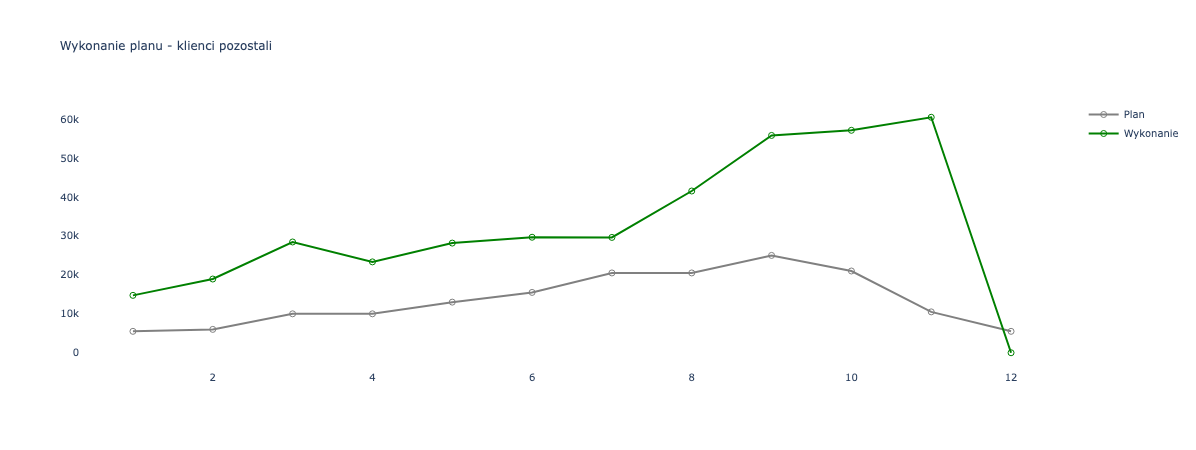

In [143]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='POZOSTALI'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - klienci pozostali')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '22_Pozostali_Wykonanie_Planu.png')
fig.show()

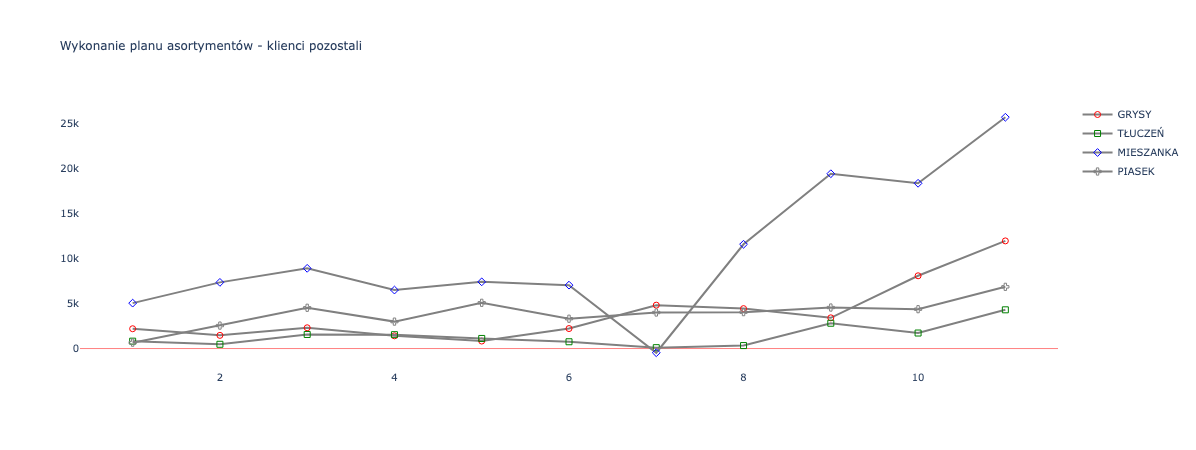

In [144]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='POZOSTALI'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - klienci pozostali')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '23_Odchylenia K Pozostali.png')
fig.show()

#### Bosta Beton

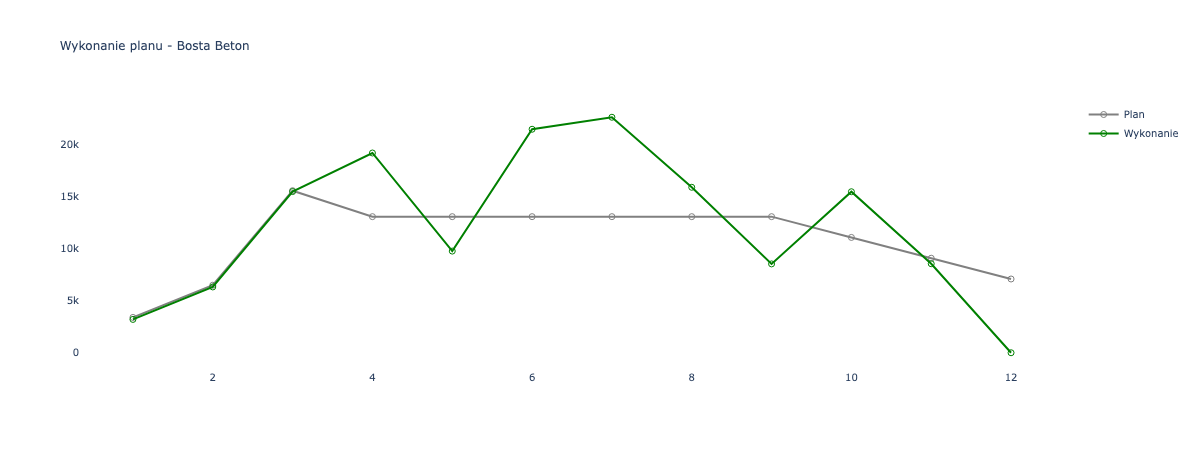

In [145]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='BOSTA-BETON'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - Bosta Beton')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '24_Bosta_Wykonanie_Planu.png')
fig.show()

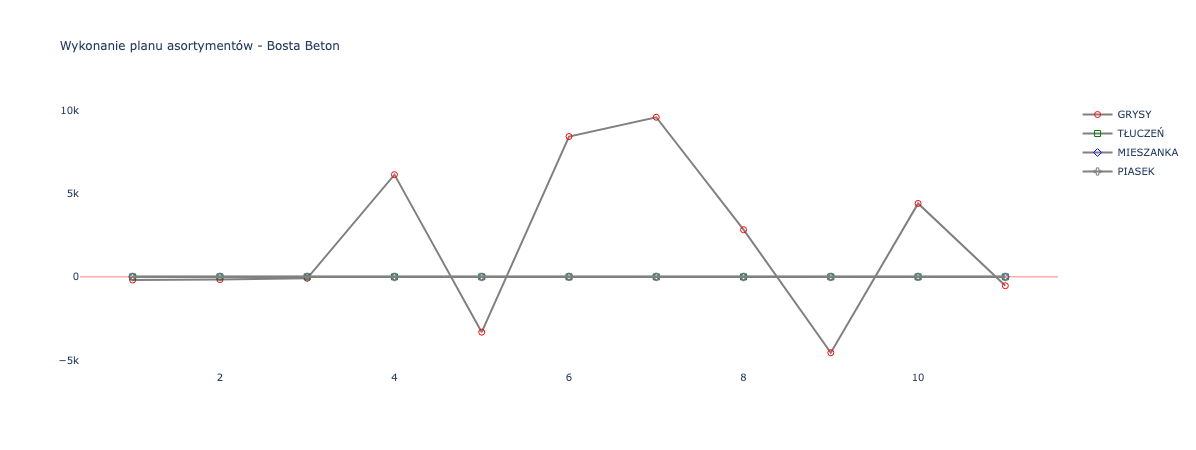

In [146]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='BOSTA-BETON'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - Bosta Beton')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '25_Odchylenia K Bosta.png')
fig.show()

#### KOMPANIA GÓRNICZA

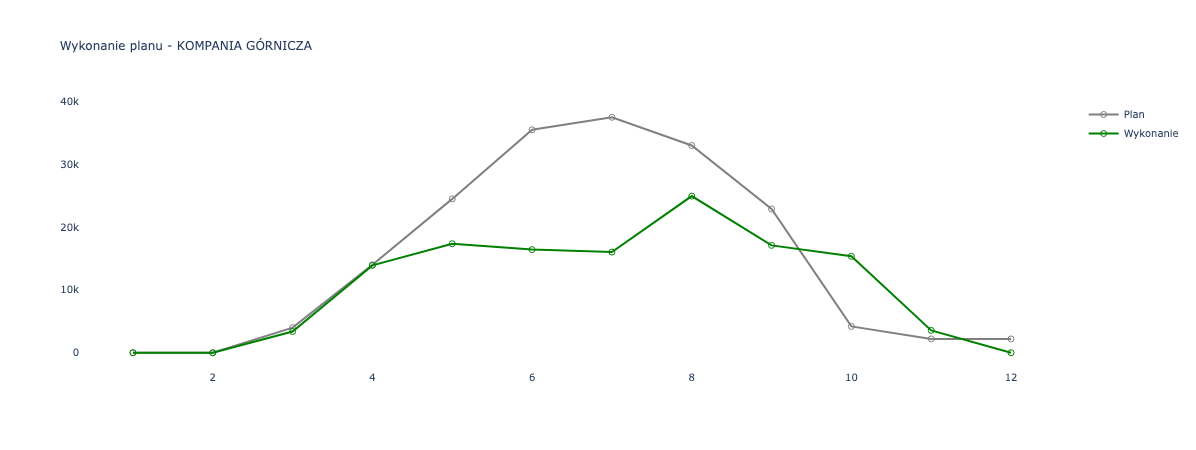

In [147]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='KOMPANIA GÓRNICZA'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - KOMPANIA GÓRNICZA')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '26_KOMPANIA GORNICZA_Wykonanie_Planu.png')
fig.show()

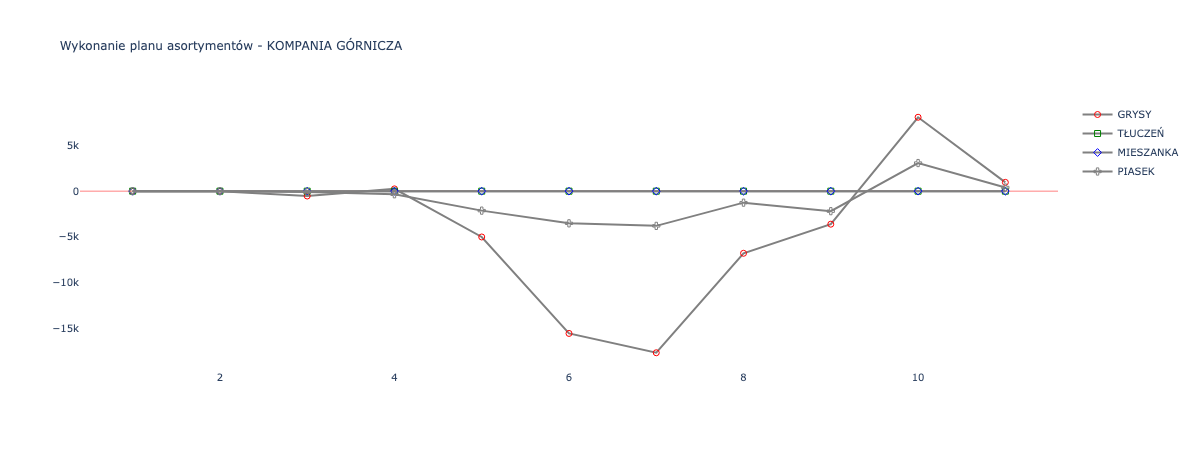

In [148]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='KOMPANIA GÓRNICZA'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - KOMPANIA GÓRNICZA')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '27_Odchylenia K KOMPANIA GORNICZA.png')
fig.show()

#### MOSTY ŁÓDŹ

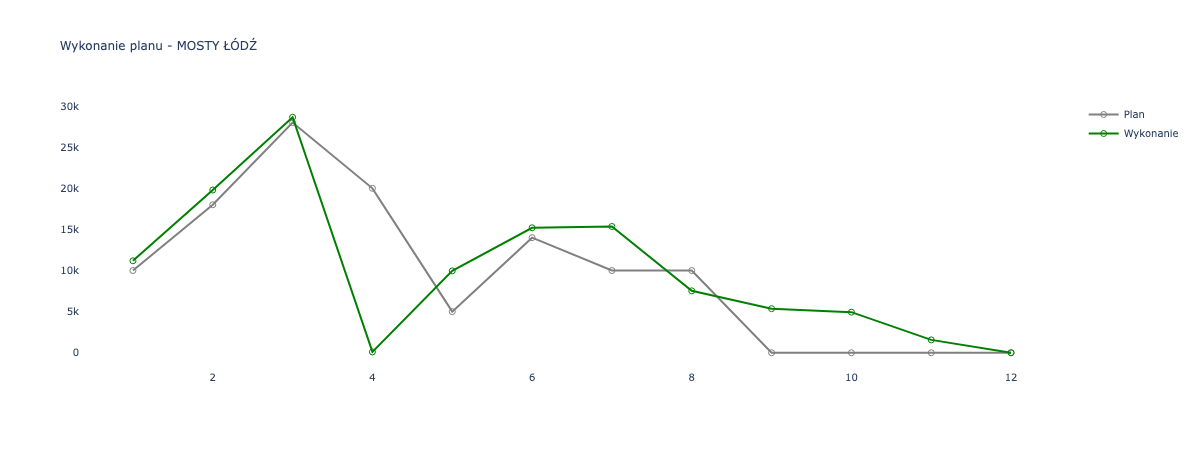

In [149]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='MOSTY ŁÓDŹ'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - MOSTY ŁÓDŹ')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '28_MOSTY LODZ_Wykonanie_Planu.png')
fig.show()

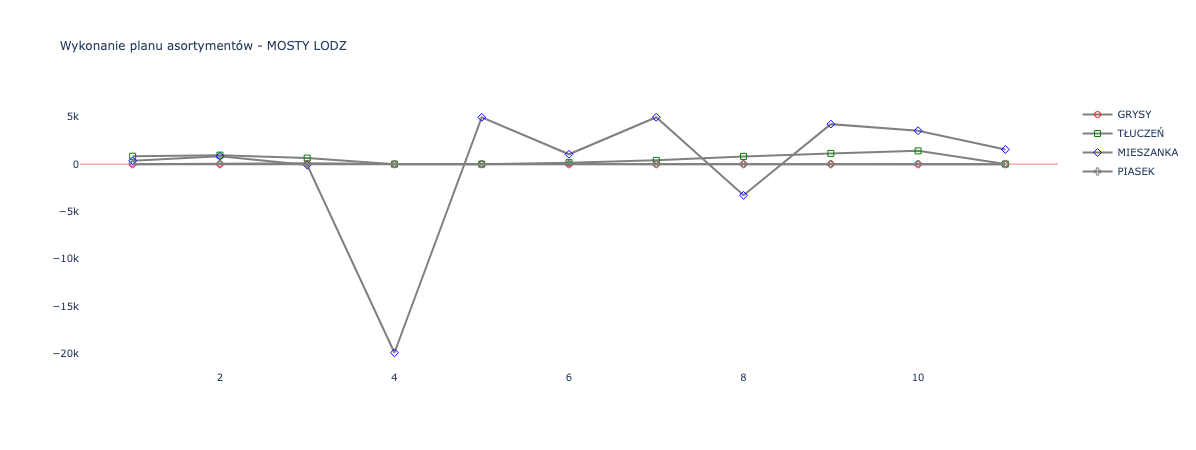

In [150]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='MOSTY ŁÓDŹ'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - MOSTY LODZ')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '29_Odchylenia MOSTY LODZ.png')
fig.show()

#### CEMEX

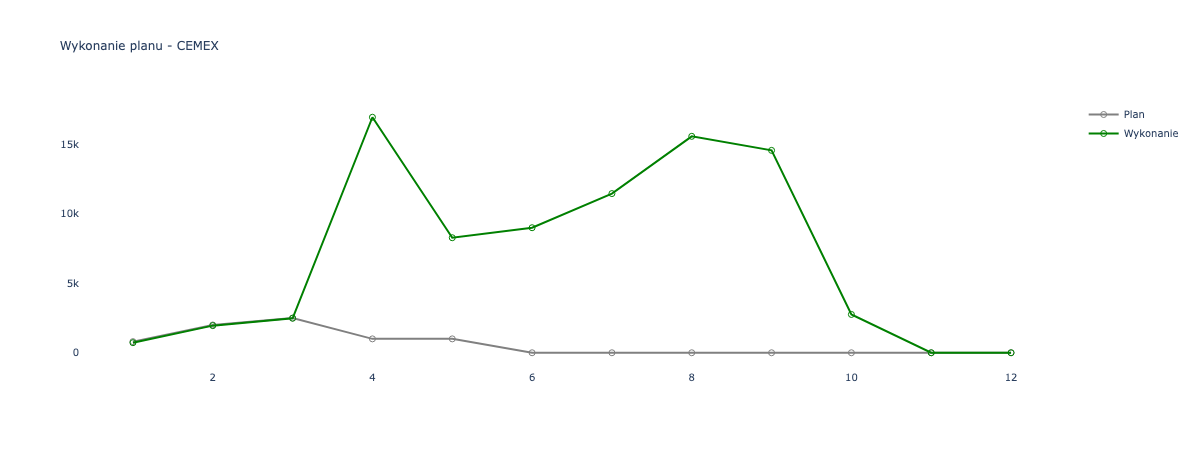

In [151]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='CEMEX'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - CEMEX')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '30_CEMEX_Wykonanie_Planu.png')
fig.show()

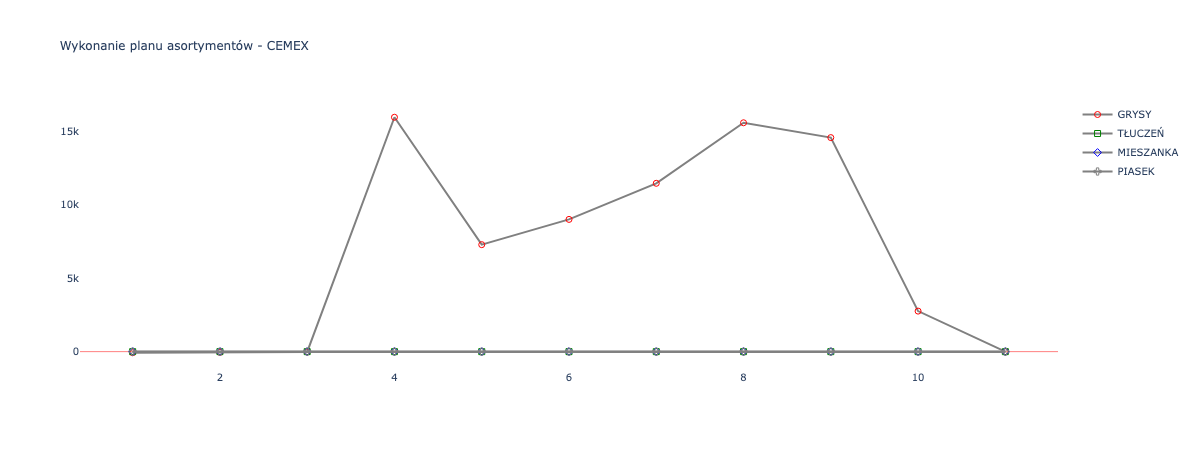

In [152]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='CEMEX'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - CEMEX')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '31_Odchylenia K CEMEX.png')
fig.show()

#### LAFARGE

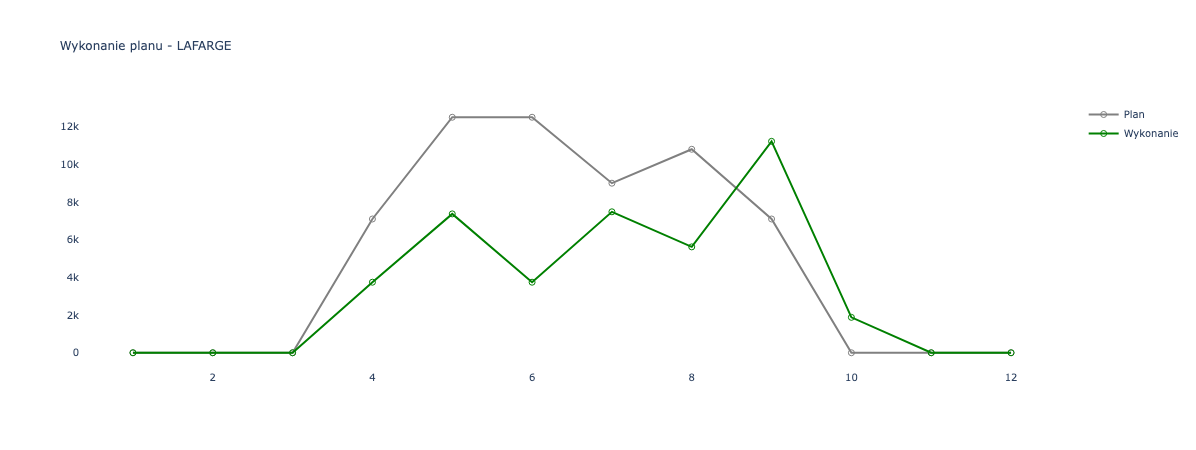

In [153]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='LAFARGE'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - LAFARGE')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '32_LAFARGE_Wykonanie_Planu.png')
fig.show()

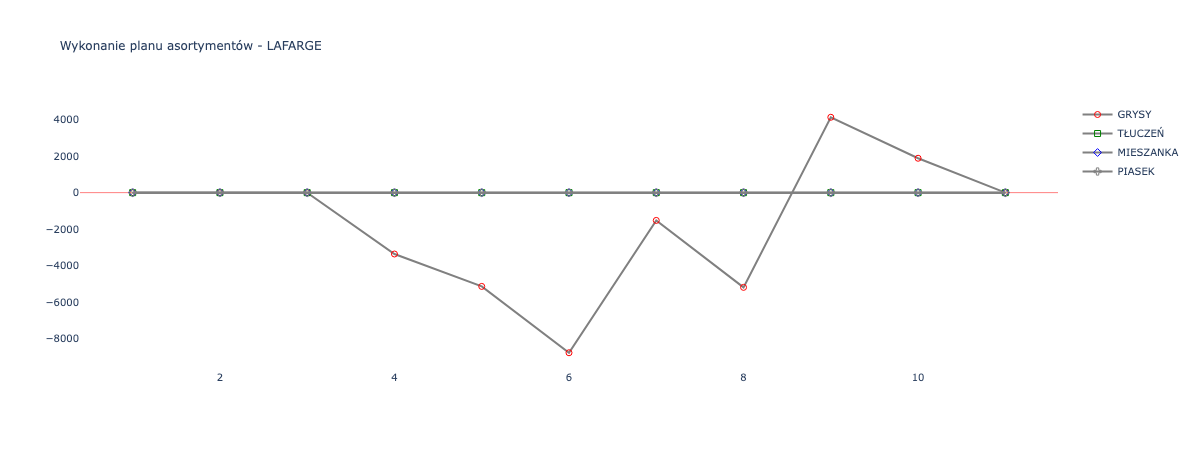

In [154]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='LAFARGE'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - LAFARGE')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '33_Odchylenia K LAFARGE.png')
fig.show()

##### KOBYLARNIA

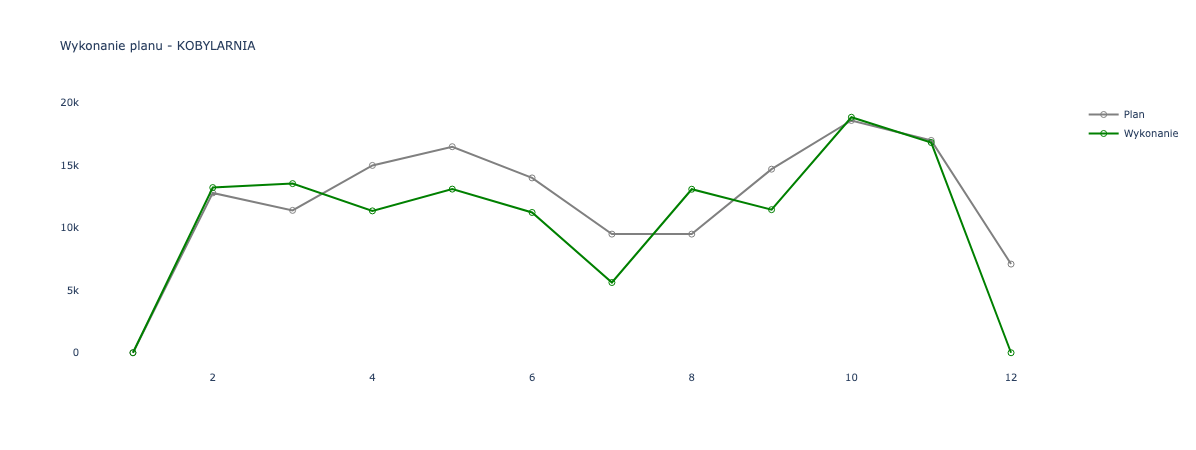

In [155]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='KOBYLARNIA'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - KOBYLARNIA')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '34_KOBYLARNIA_Wykonanie_Planu.png')
fig.show()

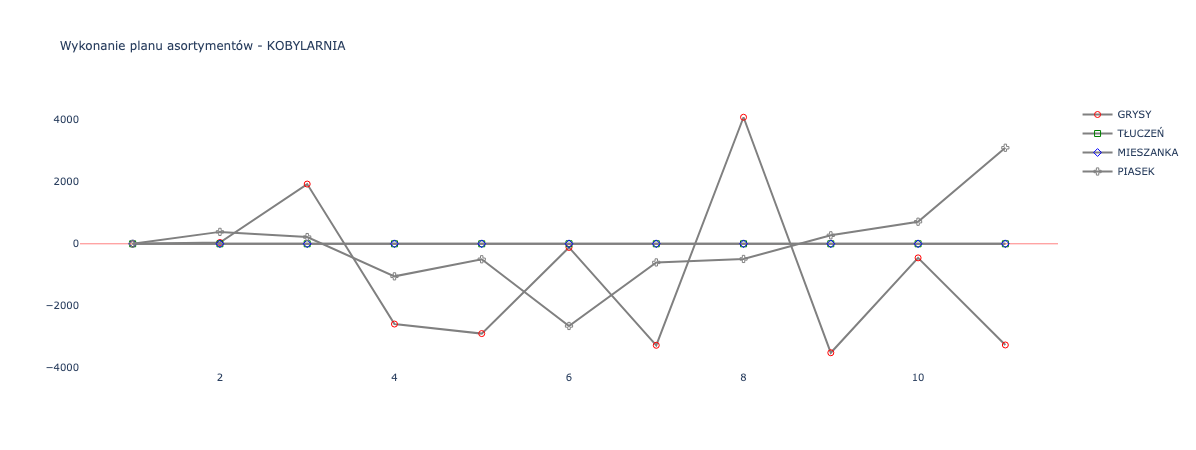

In [156]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='KOBYLARNIA'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - KOBYLARNIA')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '35_Odchylenia KKOBYLARNIA.png')
fig.show()

#### GODEL MOBILBETON

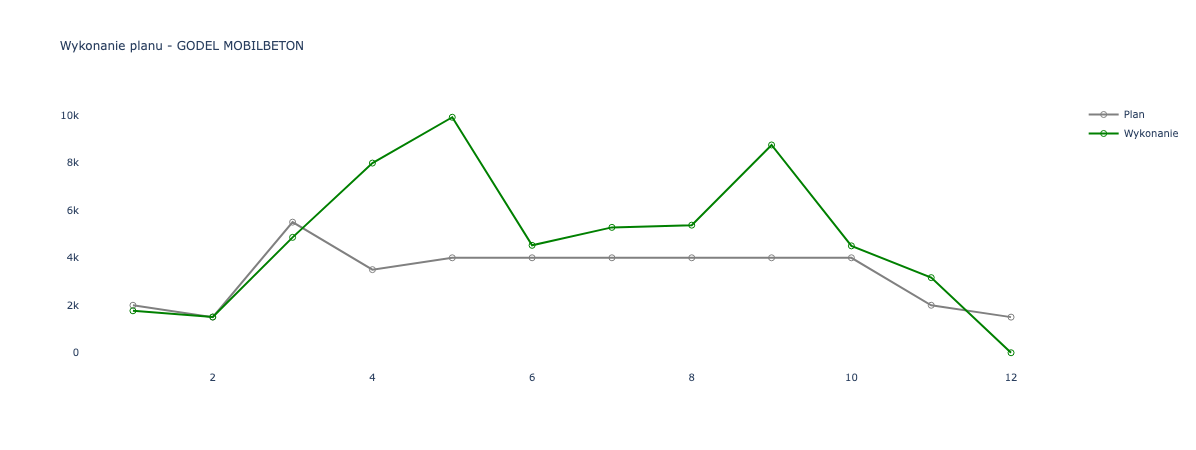

In [157]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='GODEL MOBILBETON'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - GODEL MOBILBETON')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '36_GODEL MOBILBETON_Wykonanie_Planu.png')
fig.show()

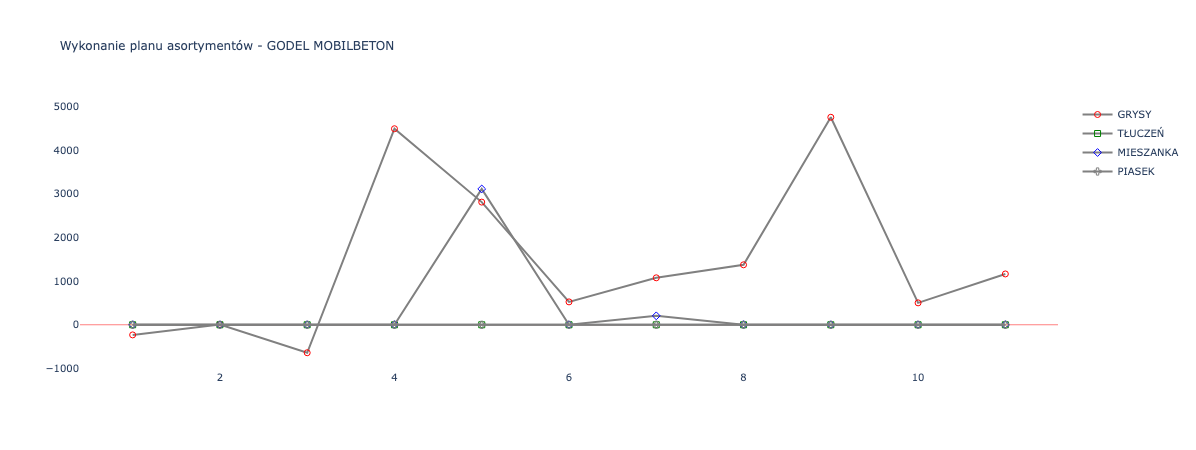

In [158]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='GODEL MOBILBETON'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - GODEL MOBILBETON')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '37_Odchylenia K GODEL MOBILBETON.png')
fig.show()

#### BUDIMEX

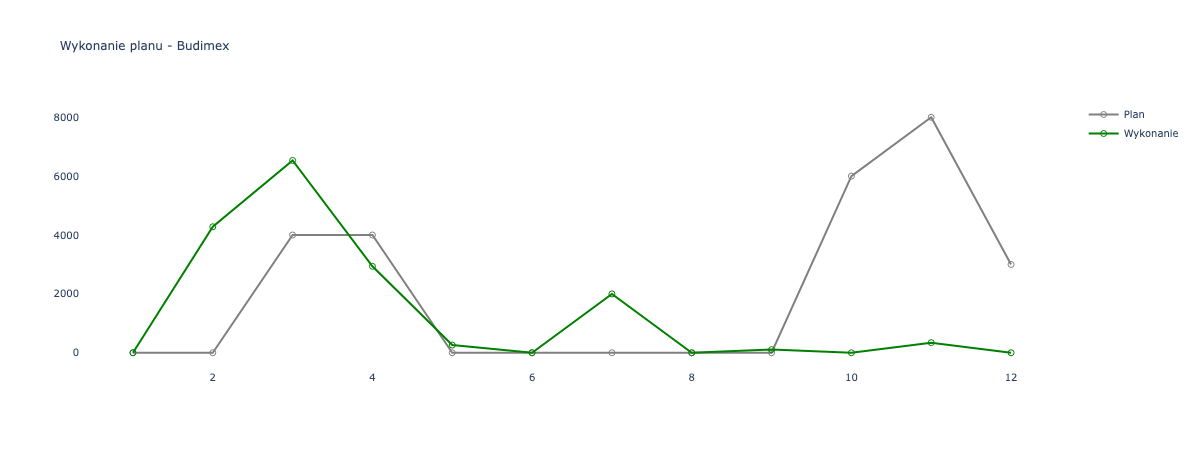

In [171]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='BUDIMEX'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - Budimex')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '38_BUDIMEX_Wykonanie_Planu.png')
fig.show()

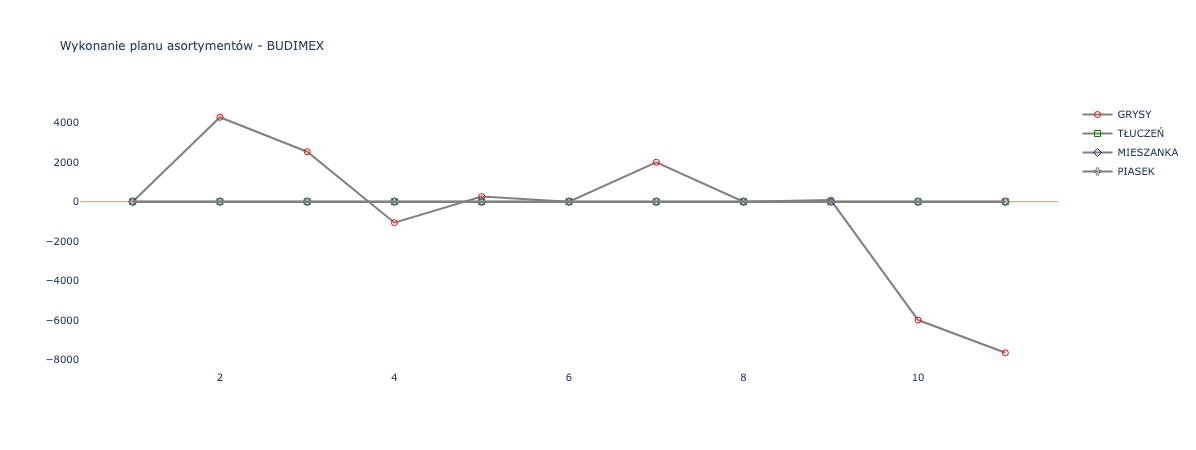

In [160]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='BUDIMEX'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - BUDIMEX')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '39_Odchylenia K BUDIMEX.png')
fig.show()

#### TOPBETON

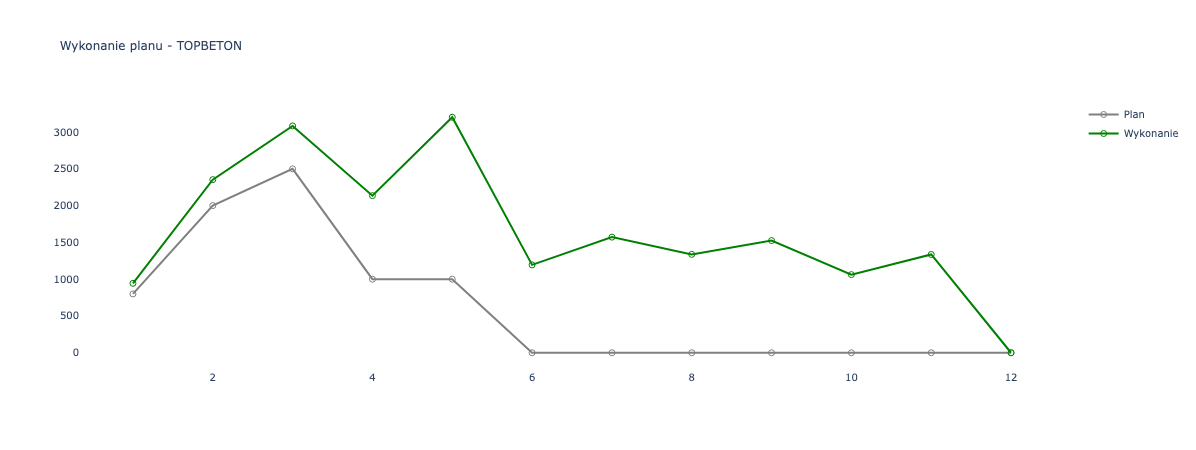

In [161]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='TOPBETON'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - TOPBETON')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '40_TOPBETON_Wykonanie_Planu.png')
fig.show()

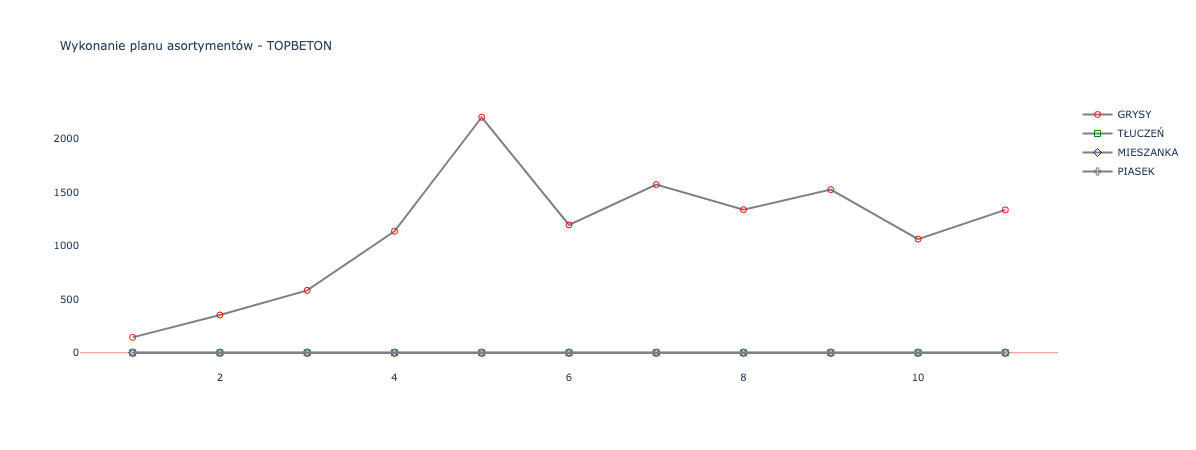

In [162]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='TOPBETON'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - TOPBETON')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '41_Odchylenia K TOPBETON.png')
fig.show()

#### STRABAG

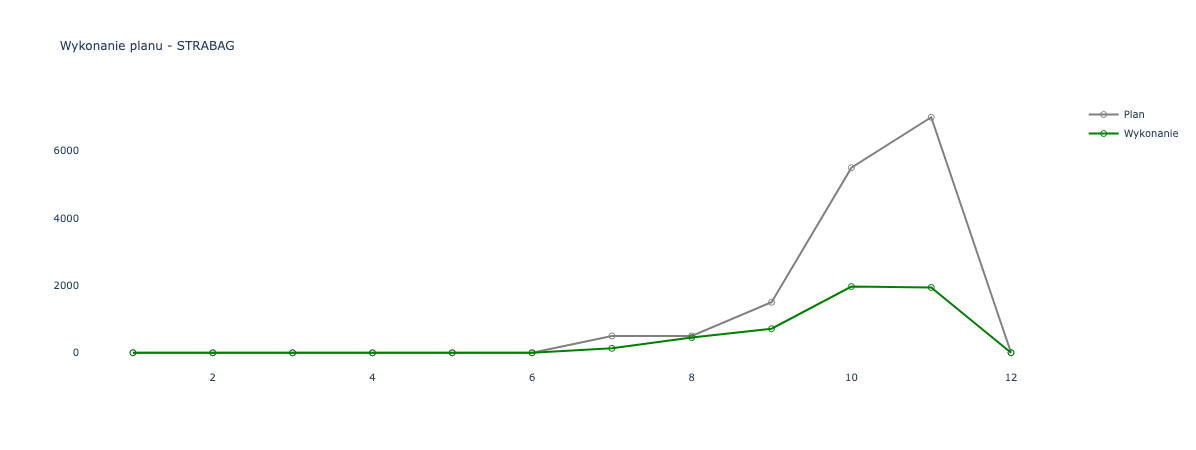

In [163]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='STRABAG'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - STRABAG')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '42_STRABAG_Wykonanie_Planu.png')
fig.show()

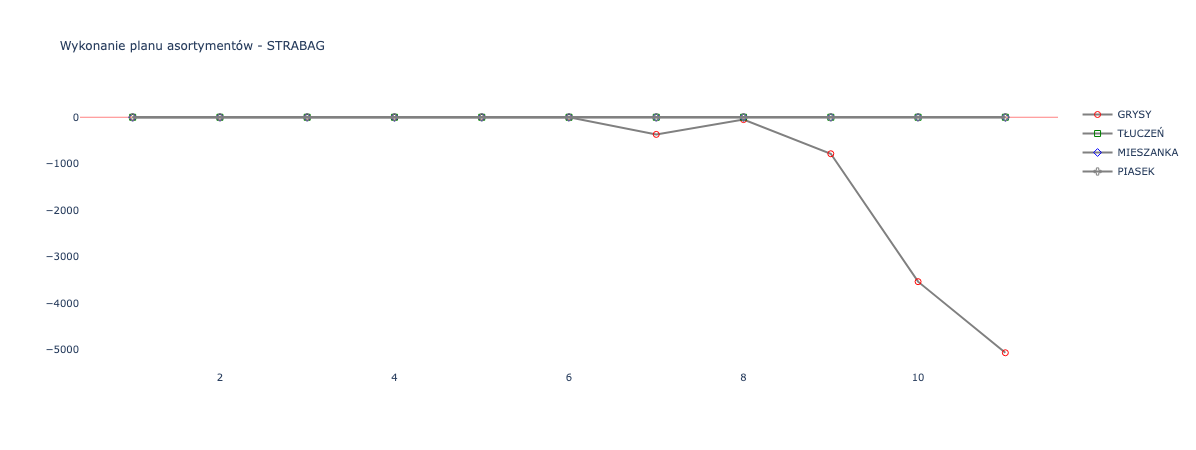

In [164]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='STRABAG'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - STRABAG')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '43_Odchylenia K STRABAG.png')
fig.show()

#### DOM

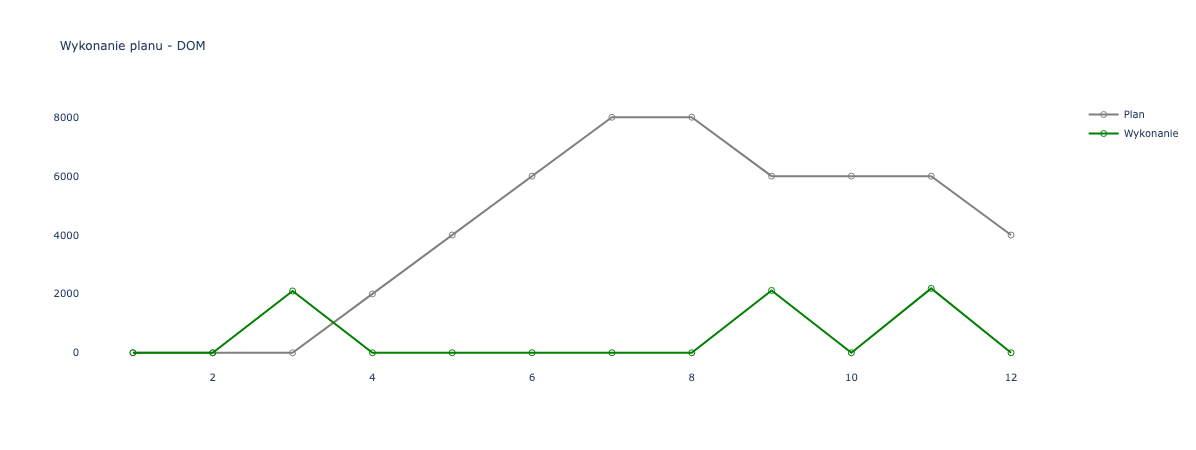

In [165]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='DOM'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - DOM')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '44_DOM_Wykonanie_Planu.png')
fig.show()

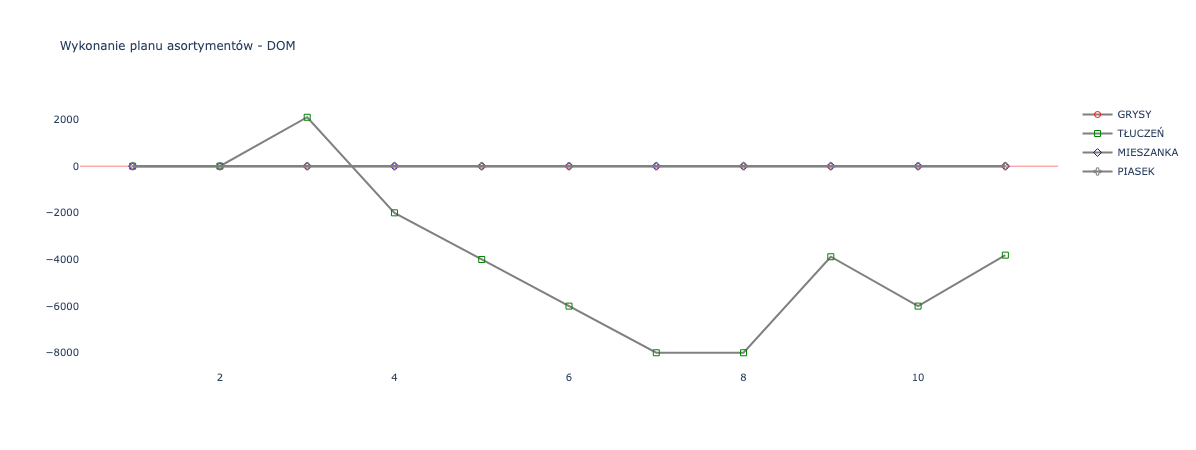

In [166]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='DOM'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - DOM')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '45_Odchylenia K DOM.png')
fig.show()

#### ERBEDIM

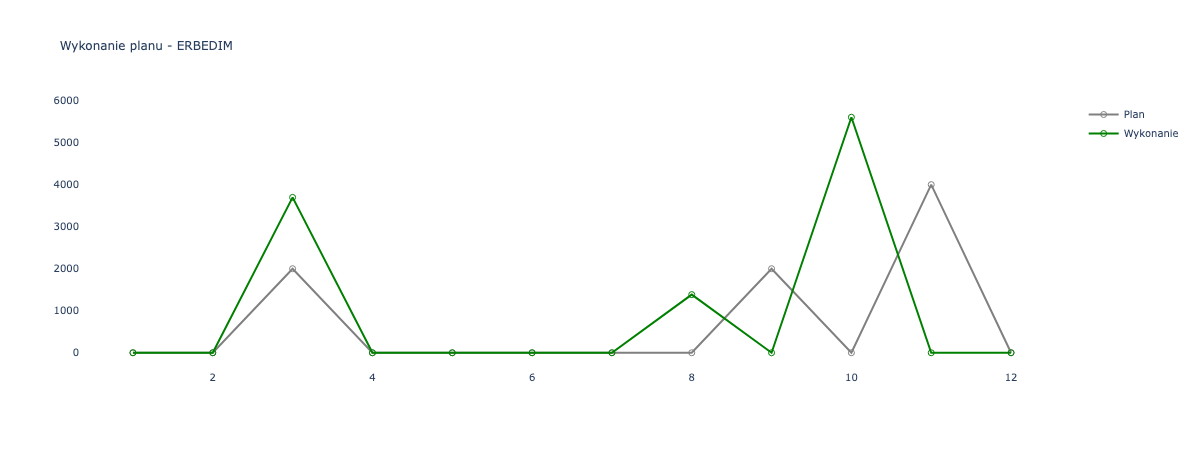

In [167]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='ERBEDIM'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - ERBEDIM')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '46_ERBEDIMWykonanie_Planu.png')
fig.show()

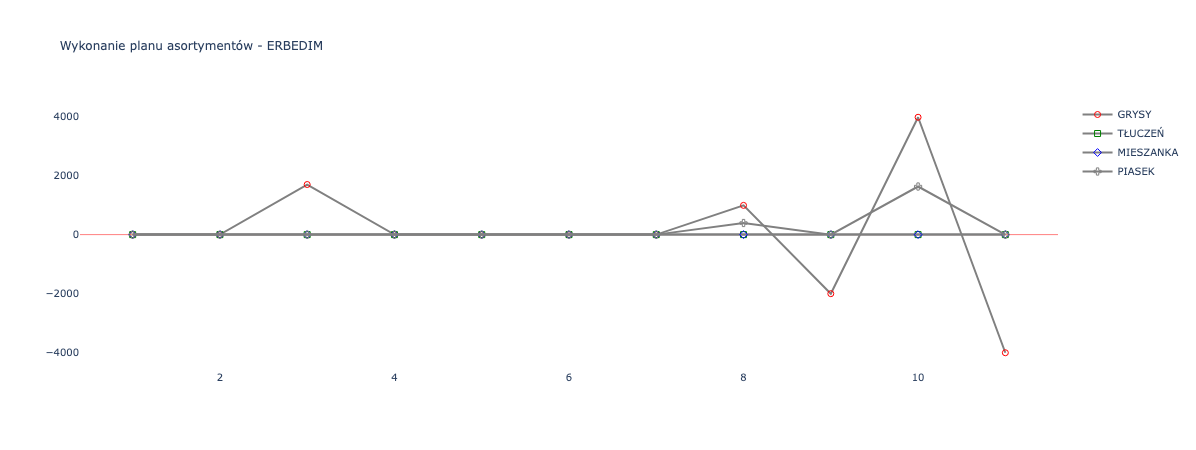

In [168]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='ERBEDIM'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - ERBEDIM')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '47_Odchylenia K ERBEDIM.png')
fig.show()

#### INTERCRAFT

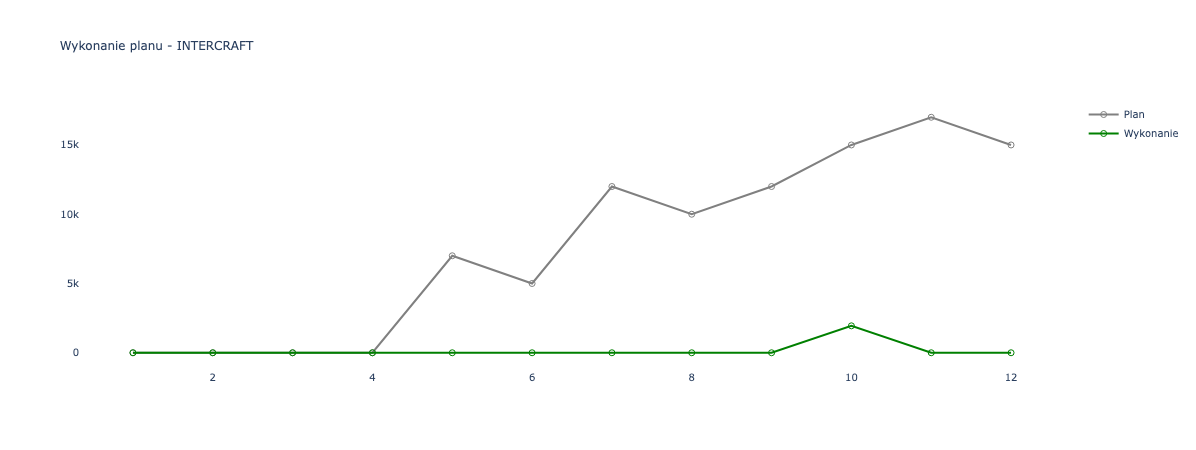

In [169]:
# Wykres

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='INTERCRAFT'].copy()
t_wykres=t_sprzedaz_temp.groupby(['M'],as_index=False)[['P_Ile','W_Ile']].sum()
#t_wykres=t_wykres[t_wykres['M']<=msc]
#t_wykres['P_Ile']=t_wykres['P_Ile'].cumsum()
#t_wykres['W_Ile']=t_wykres['W_Ile'].cumsum()

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['P_Ile'],  marker_symbol='circle-open',name="Plan",line= {"color": "gray", "width": 2}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['W_Ile'],  marker_symbol='circle-open',name="Wykonanie",line= {"color": "green", "width": 2}),row=1,col=1)
fig.update_layout(title_text='Wykonanie planu - INTERCRAFT')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.write_image(IMAGES / '48_INTERCRAFT_Wykonanie_Planu.png')
fig.show()

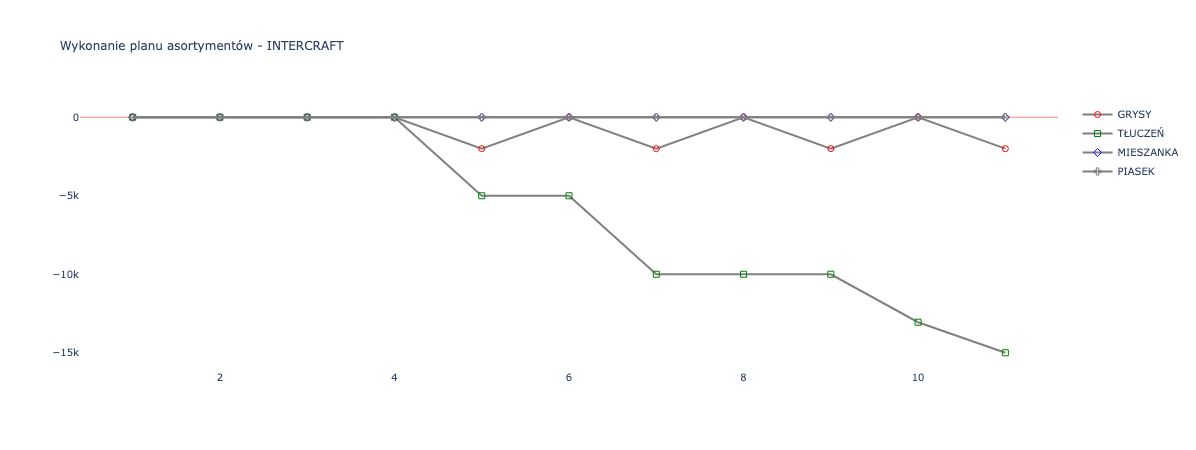

In [170]:
# Wykres odchyleń

t_sprzedaz_temp=t_sprzedaz_p[t_sprzedaz_p['N_Kontrahent']=='INTERCRAFT'].copy()
t_sprzedaz_temp['Odchylenie']=t_sprzedaz_temp['W_Ile']-t_sprzedaz_temp['P_Ile']
t_wykres=t_sprzedaz_temp.groupby(['M','TYP'],as_index=False)[['Odchylenie']].sum()

t_wykres['GRYSY']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='GRYSY' else 0,axis=1)
t_wykres['MIESZANKA']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='MIESZANKA' else 0,axis=1)
t_wykres['TŁUCZEŃ']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='TŁUCZEŃ' else 0,axis=1)
t_wykres['PIASEK']=t_wykres.apply(lambda x:x['Odchylenie'] if x['TYP']=='PIASEK' else 0,axis=1)
t_wykres=t_wykres.groupby(['M'],as_index=False)[['GRYSY','TŁUCZEŃ','MIESZANKA','PIASEK']].sum()
t_wykres=t_wykres[t_wykres['M']<=msc]

fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['GRYSY'],  marker_symbol='circle-open',name="GRYSY",line= {"color": "gray", "width": 2},marker={"color":"red"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['TŁUCZEŃ'],  marker_symbol='square-open',name="TŁUCZEŃ",line= {"color": "gray", "width": 2},marker={"color":"green"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['MIESZANKA'],  marker_symbol='diamond-open',name="MIESZANKA",line= {"color": "gray", "width": 2},marker={"color":"blue"}),row=1,col=1)
fig.add_trace(go.Scatter(x=t_wykres['M'], y=t_wykres['PIASEK'],  marker_symbol='cross-open',name="PIASEK",line= {"color": "gray", "width": 2}),row=1,col=1)

fig.update_layout(title_text='Wykonanie planu asortymentów - INTERCRAFT')
fig.update_layout(plot_bgcolor='#FFFFFF',font_size=10,title_font_size=12,width=700, height=450)
fig.update_yaxes(zeroline=True, zerolinewidth=0.5, zerolinecolor='red')
fig.write_image(IMAGES / '49_Odchylenia K INTERCRAFT.png')
fig.show()

# KONIEC